# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = "qwen2.5-coder"  # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: papa-game


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

type                                                sql
0   table  CREATE TABLE "albums"\r\n(\r\n    [AlbumId] IN...
1   table             CREATE TABLE sqlite_sequence(name,seq)
2   table  CREATE TABLE "artists"\r\n(\r\n    [ArtistId] ...
3   table  CREATE TABLE "customers"\r\n(\r\n    [Customer...
4   table  CREATE TABLE "employees"\r\n(\r\n    [Employee...
5   table  CREATE TABLE "genres"\r\n(\r\n    [GenreId] IN...
6   table  CREATE TABLE "invoices"\r\n(\r\n    [InvoiceId...
7   table  CREATE TABLE "invoice_items"\r\n(\r\n    [Invo...
8   table  CREATE TABLE "media_types"\r\n(\r\n    [MediaT...
9   table  CREATE TABLE "playlists"\r\n(\r\n    [Playlist...
10  table  CREATE TABLE "playlist_track"\r\n(\r\n    [Pla...
11  table  CREATE TABLE "tracks"\r\n(\r\n    [TrackId] IN...
12  index  CREATE INDEX [IFK_AlbumArtistId] ON "albums" (...
13  index  CREATE INDEX [IFK_CustomerSupportRepId] ON "cu...
14  index  CREATE INDEX [IFK_EmployeeReportsTo] ON "emplo...
15  index  CREATE INDEX [IFK_InvoiceCustomerId] ON "invoi...
16  index  CREATE INDEX [IFK_InvoiceLineInvoiceId] ON "in...
17  index  CREATE INDEX [IFK_InvoiceLineTrackId] ON "invo...
18  index  CREATE INDEX [IFK_PlaylistTrackTrackId] ON "pl...
19  index  CREATE INDEX [IFK_TrackAlbumId] ON "tracks" ([...
20  index  CREATE INDEX [IFK_TrackGenreId] ON "tracks" ([...
21  index  CREATE INDEX [IFK_TrackMediaTypeId] ON "tracks...
22  table            CREATE TABLE sqlite_stat1(tbl,idx,stat)

In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

id question  \
0   039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl     None   
1   0db84e3d-ef41-563c-803e-21c1b985dc19-ddl     None   
2   10cba811-ddba-5042-9e90-d764dfcd1629-ddl     None   
3   2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl     None   
4   37319c81-65f7-50ee-956b-795de244bee5-ddl     None   
5   40bd77cd-e1de-5872-8693-624117ff413c-ddl     None   
6   41130543-7164-562a-90a7-0fd0a409c154-ddl     None   
7   458debc8-8082-5450-a17a-66028bd55ace-ddl     None   
8   4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl     None   
9   48d484e9-984c-58ff-b391-75521c69d486-ddl     None   
10  551e1120-a6ee-554f-8b8a-ccf4f22d3636-ddl     None   
11  5ff4911e-45c1-5a59-9566-243a9b6a3320-ddl     None   
12  65df0648-bf05-5f75-9365-c21f54b2302d-ddl     None   
13  6b585176-e66d-5b23-8d86-ca8a80e3af3d-ddl     None   
14  868758b8-e018-55e7-8cc3-75c0e6d211c8-ddl     None   
15  9ea4613d-c1be-5a77-ada9-c54ee3f0cab7-ddl     None   
16  a9c9a852-608d-5ef2-aede-26ba098d83d1-ddl     None   
17  b42cc9e1-9219-5a42-9a06-de906f76239e-ddl     None   
18  c387b9d2-5ff4-5a07-8364-f5dab45bb2a9-ddl     None   
19  d654f328-dc36-549e-84c3-06ee0db7e0f7-ddl     None   
20  d93f0d68-023d-5afb-8121-ba346699d318-ddl     None   
21  e5879308-329e-543f-a693-0c14e2f9972e-ddl     None   
22  ea84418b-1a28-59b4-a1f4-2fb674208adc-ddl     None   
0   2b4dda0a-a6ac-5e34-8f76-e41c0734d55e-doc     None   
1   ece10d36-9223-5045-9ac8-4b5bc090acb5-doc     None   

                                              content training_data_type  
0   CREATE TABLE "artists"\r\n(\r\n    ArtistId IN...                ddl  
1   CREATE TABLE "invoices"\r\n(\r\n    InvoiceId ...                ddl  
2   CREATE INDEX IFK_InvoiceCustomerId ON "invoice...                ddl  
3   CREATE INDEX IFK_CustomerSupportRepId ON "cust...                ddl  
4             CREATE TABLE sqlite_stat1(tbl,idx,stat)                ddl  
5   CREATE INDEX IFK_InvoiceLineInvoiceId ON "invo...                ddl  
6   CREATE TABLE "albums"\r\n(\r\n    AlbumId INTE...                ddl  
7   CREATE TABLE "playlists"\r\n(\r\n    PlaylistI...                ddl  
8   CREATE TABLE "invoice_items"\r\n(\r\n    Invoi...                ddl  
9   CREATE INDEX IFK_PlaylistTrackTrackId ON "play...                ddl  
10  CREATE INDEX IFK_AlbumArtistId ON "albums" (Ar...                ddl  
11  CREATE TABLE "employees"\r\n(\r\n    EmployeeI...                ddl  
12  CREATE TABLE "media_types"\r\n(\r\n    MediaTy...                ddl  
13  CREATE INDEX IFK_EmployeeReportsTo ON "employe...                ddl  
14  CREATE INDEX IFK_TrackAlbumId ON "tracks" (Alb...                ddl  
15  CREATE INDEX IFK_TrackMediaTypeId ON "tracks" ...                ddl  
16  CREATE INDEX IFK_TrackGenreId ON "tracks" (Gen...                ddl  
17  CREATE TABLE "tracks"\r\n(\r\n    TrackId INTE...                ddl  
18  CREATE TABLE "genres"\r\n(\r\n    GenreId INTE...                ddl  
19  CREATE TABLE "playlist_track"\r\n(\r\n    Play...                ddl  
20  CREATE TABLE "customers"\r\n(\r\n    CustomerI...                ddl  
21  CREATE INDEX IFK_InvoiceLineTrackId ON "invoic...                ddl  
22             CREATE TABLE sqlite_sequence(name,seq)                ddl  
0         In the chinook database invoice means order      documentation  
1   \n    In the 'customers' table, address column...      documentation

## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['name'].iloc[0],
        number={'font_size': 24},
        title={'text': "Table Name"}
    ))
else:
    fig = go.Figure(data=[go.Table(
        header=dict(values=['Table Names']),
        cells=dict(values=[df['name']])
    )])

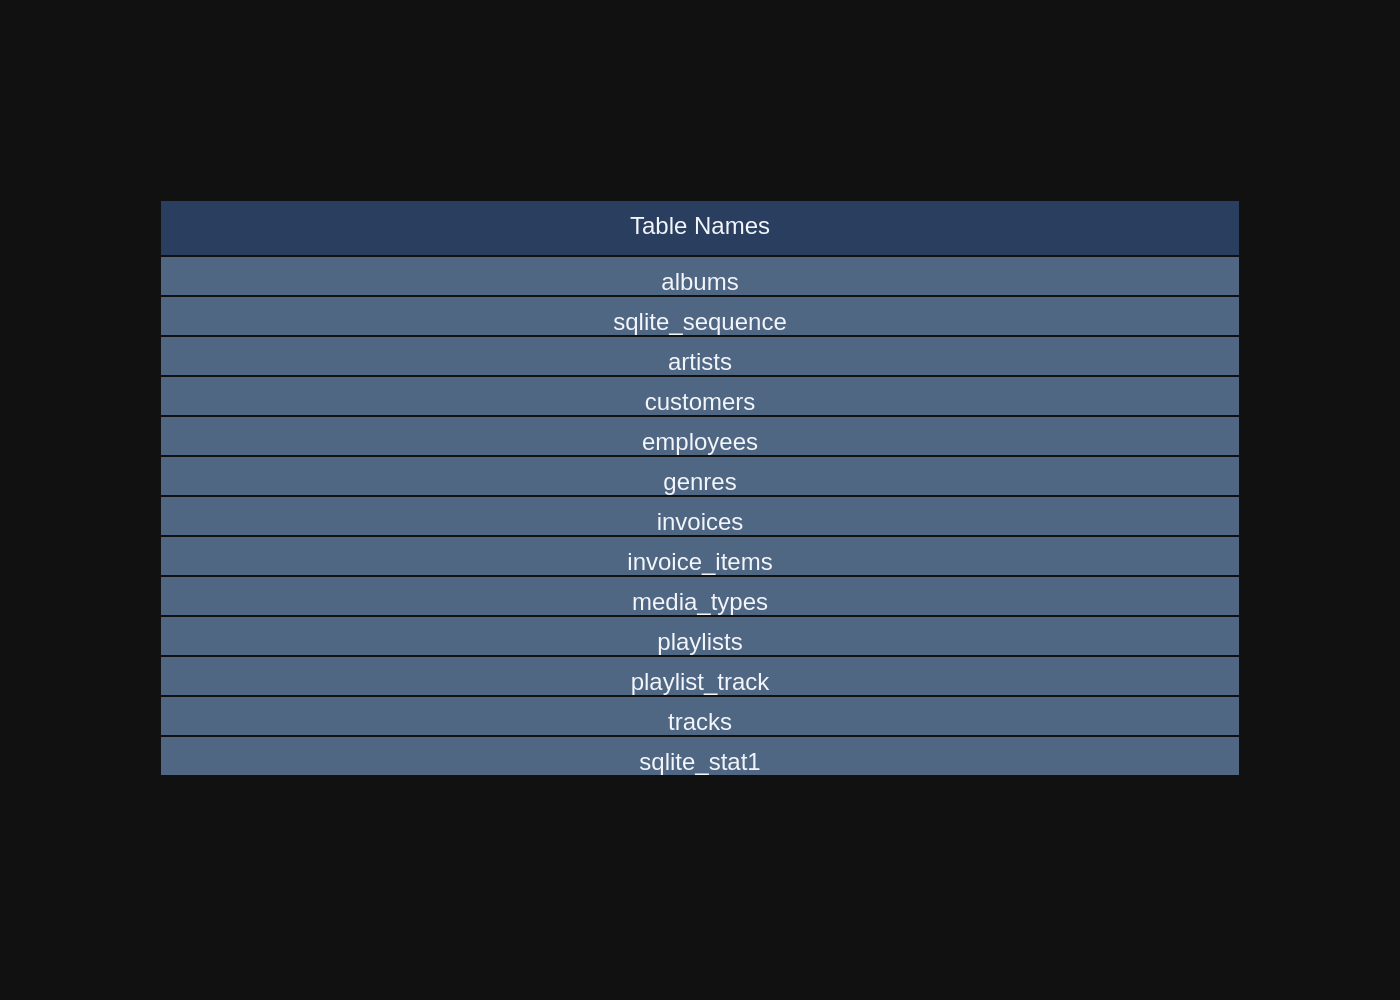





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceId FROM invoices


[( <DataFrame> )]
queried dataframe



InvoiceId
0          98
1         121
2         143
3         195
4         316
5         327
6         382
7           1
8          12
9          67
10        196
11        219
12        241
13        293
14         99
15        110
16        165
17        294
18        317
19        339


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['InvoiceId'].iloc[0],
        title={'text': "Number of Invoices"}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df.index, y=df['InvoiceId'])])

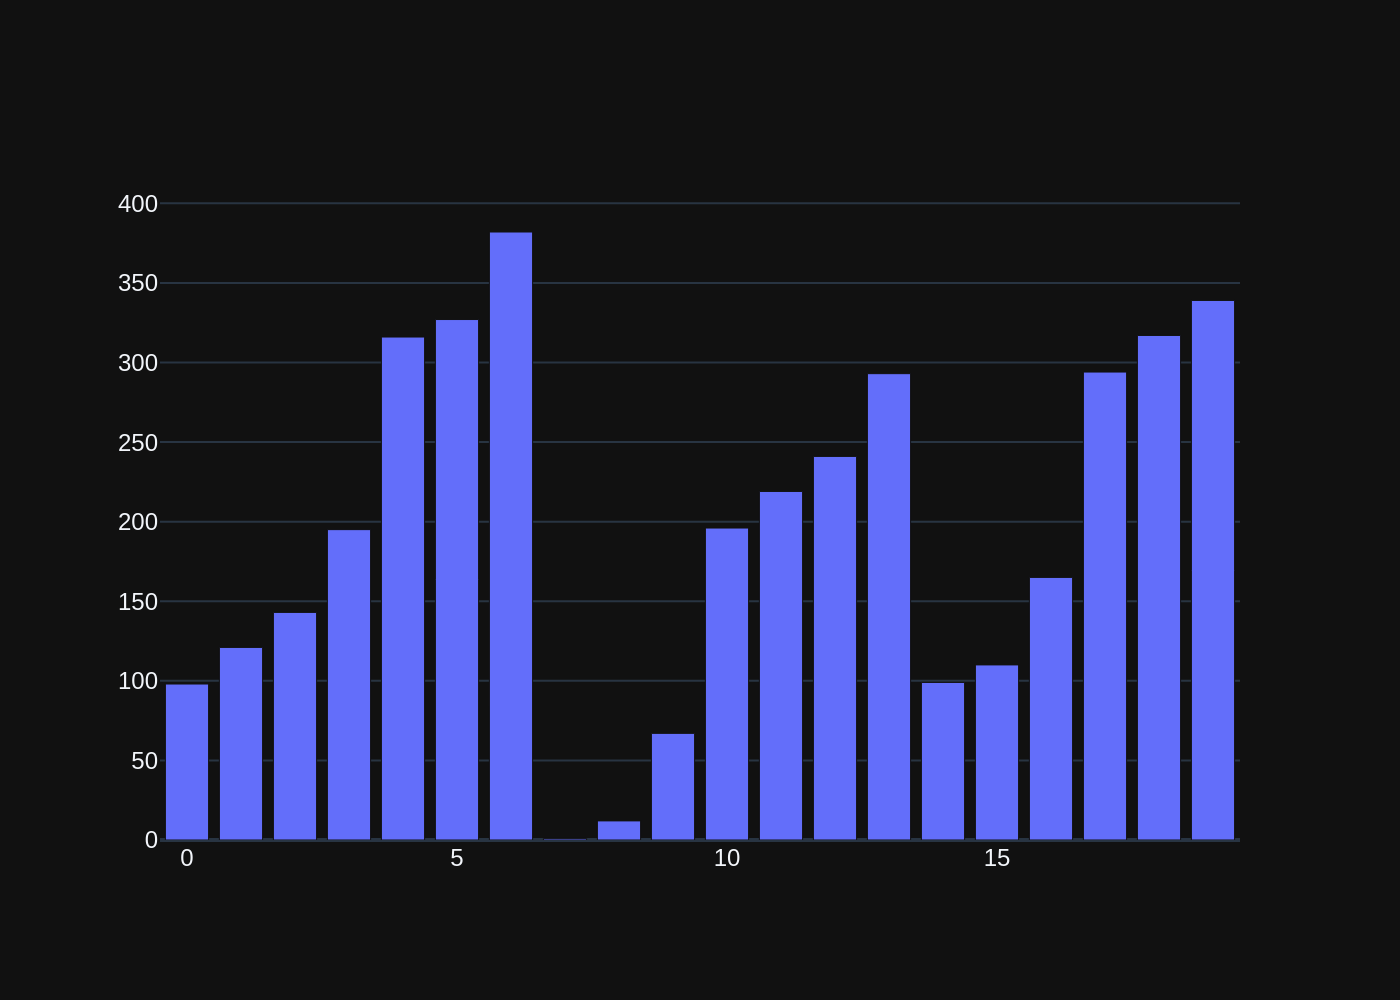





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(CustomerId) FROM customers


[( <DataFrame> )]
queried dataframe



COUNT(CustomerId)
0                 59


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['COUNT(CustomerId)'].values[0],
        number_font_size=45,
        title={'text': "Number of Customers"}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=['Customers'], y=df['COUNT(CustomerId)'])])

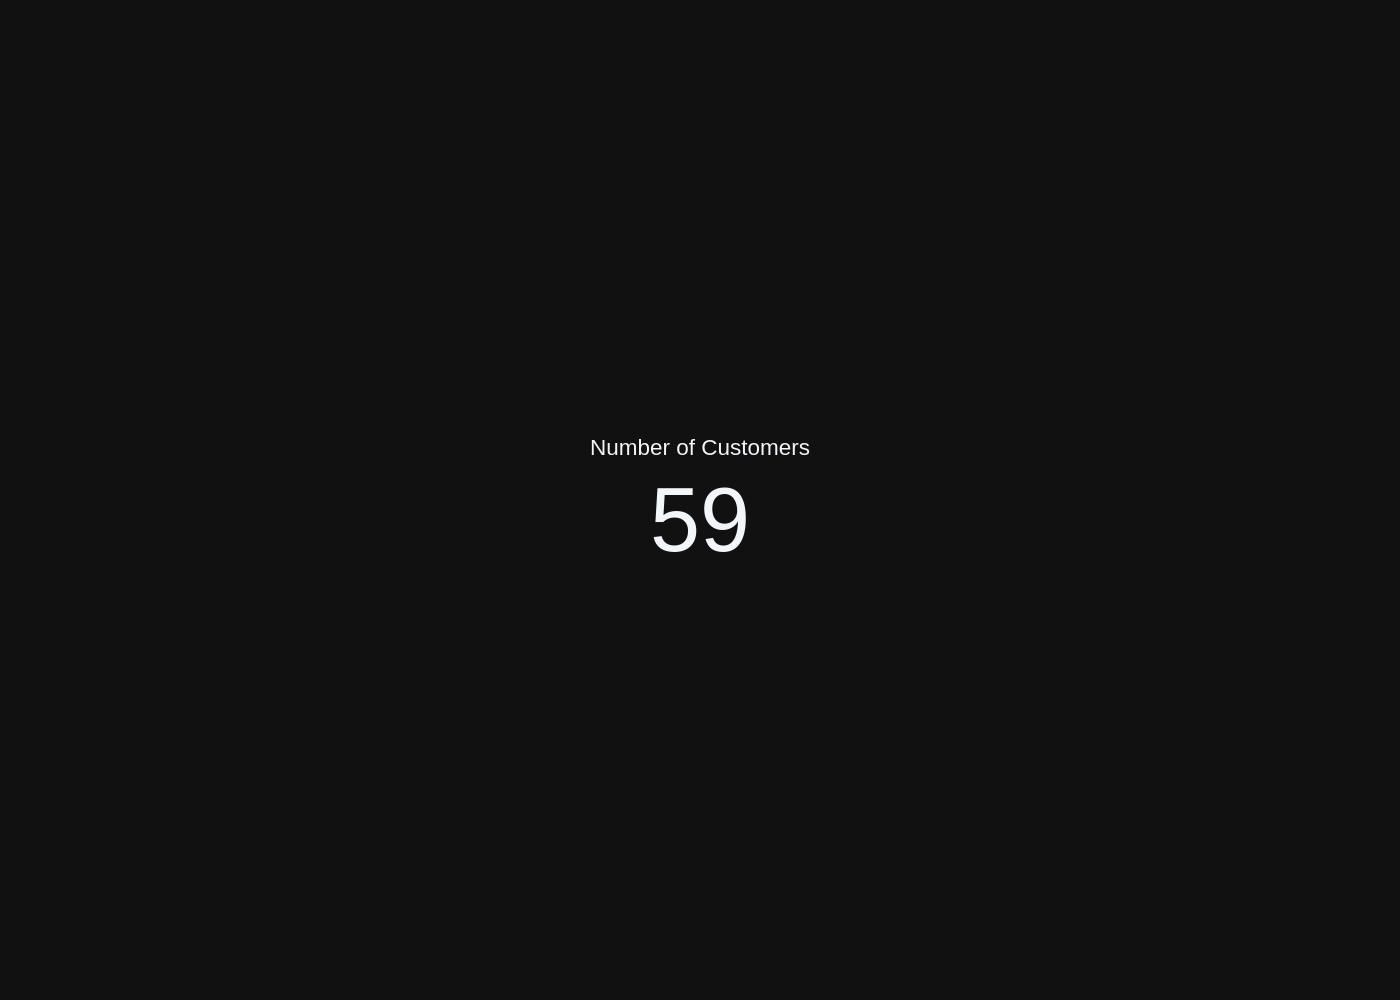





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Country, COUNT(*) AS NumberOfCustomers FROM customers GROUP BY Country ORDER BY NumberOfCustomers DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



Country  NumberOfCustomers
0      USA                 13
1   Canada                  8
2   France                  5
3   Brazil                  5
4  Germany                  4


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['NumberOfCustomers'].iloc[0],
        number={'prefix': df['Country'].iloc[0] + ': '},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure(go.Bar(
        x=df['Country'],
        y=df['NumberOfCustomers'],
        marker_color='indianred'
    ))

fig.update_layout(title_text="Top 5 Countries by Number of Customers")

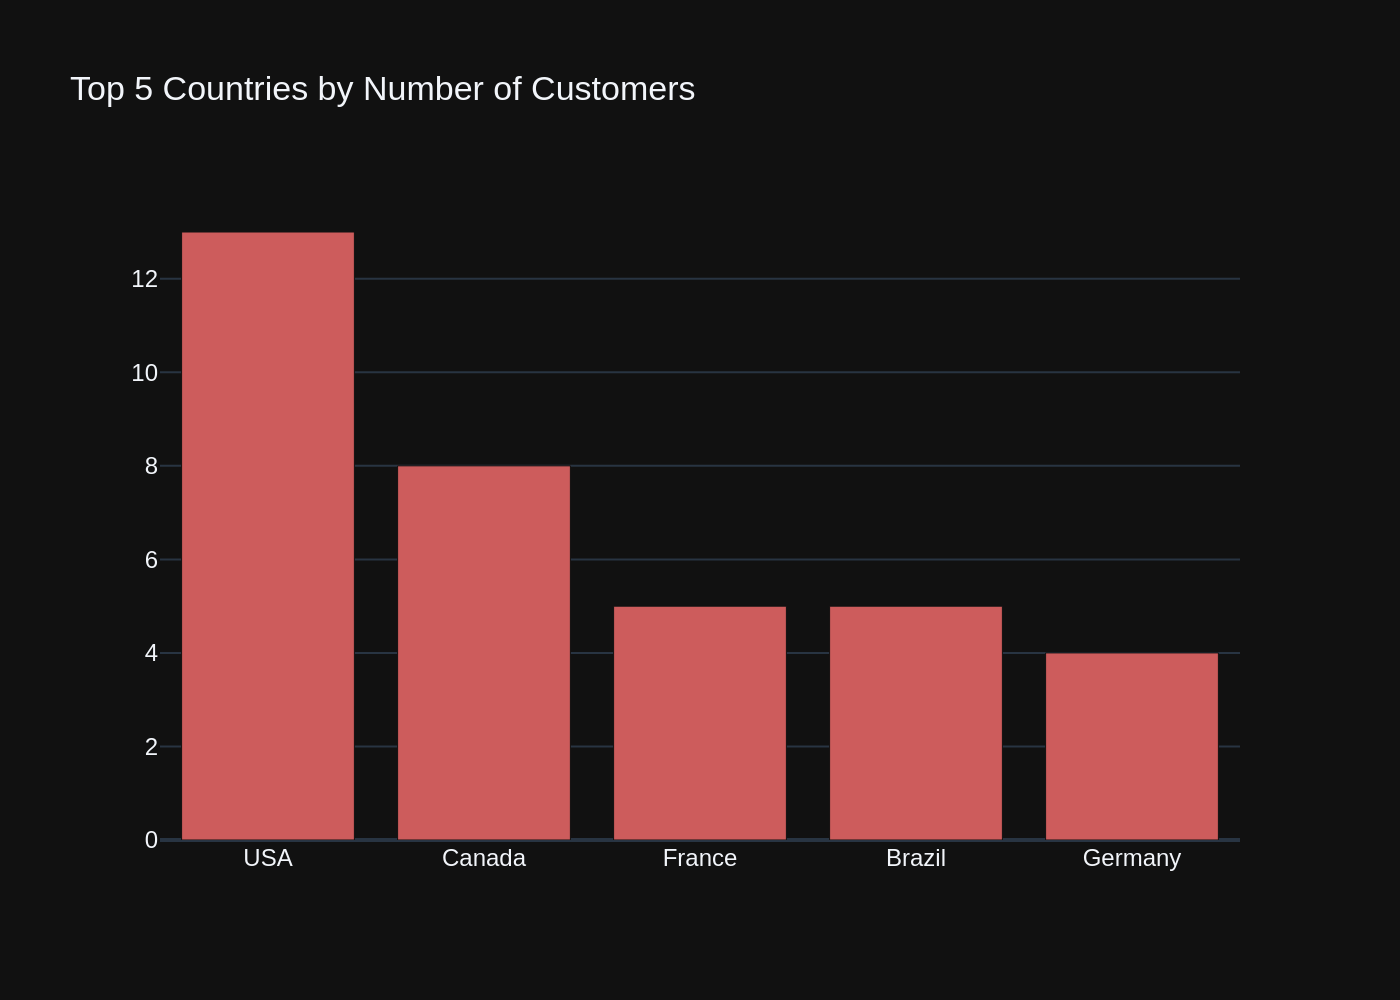





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Title, T3.Name FROM albums AS T1 INNER JOIN artists AS T3 ON T1.ArtistId = T3.ArtistId LIMIT 20


[( <DataFrame> )]
queried dataframe



Title                  Name
0              For Those About To Rock We Salute You                 AC/DC
1                                  Balls to the Wall                Accept
2                                  Restless and Wild                Accept
3                                  Let There Be Rock                 AC/DC
4                                           Big Ones             Aerosmith
5                                 Jagged Little Pill     Alanis Morissette
6                                           Facelift       Alice In Chains
7                                     Warner 25 Anos  Antônio Carlos Jobim
8                     Plays Metallica By Four Cellos          Apocalyptica
9                                         Audioslave            Audioslave
10                                      Out Of Exile            Audioslave
11                               BackBeat Soundtrack              BackBeat
12                          The Best Of Billy Cobham          Billy Cobham
13          Alcohol Fueled Brewtality Live! [Disc 1]   Black Label Society
14          Alcohol Fueled Brewtality Live! [Disc 2]   Black Label Society
15                                     Black Sabbath         Black Sabbath
16                   Black Sabbath Vol. 4 (Remaster)         Black Sabbath
17                                        Body Count            Body Count
18                                  Chemical Wedding       Bruce Dickinson
19  The Best Of Buddy Guy - The Millenium Collection             Buddy Guy


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(
        mode="number",
        title=df.iloc[0, 0],
        value=df.iloc[0, 1]
    )
else:
    fig = px.bar(df, x='Name', y='Title', labels={'Name': 'Artist Name', 'Title': 'Album Title'})

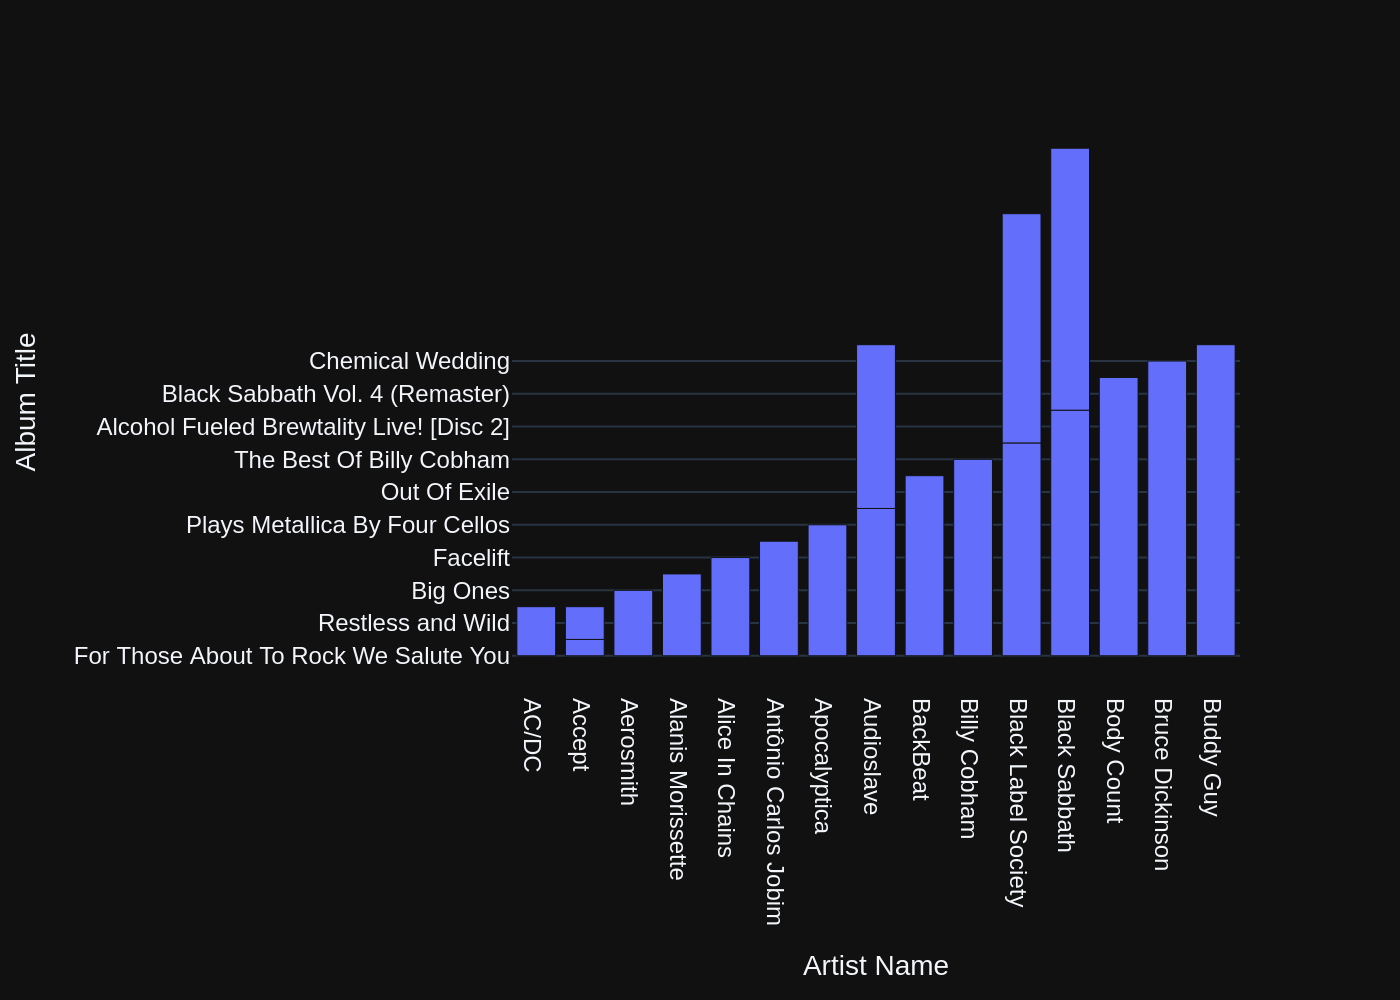





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM tracks WHERE Name LIKE '%What%' COLLATE NOCASE LIMIT 20


[( <DataFrame> )]
queried dataframe



TrackId                                          Name  AlbumId  \
0        26                                 What It Takes        5   
1        88                                  What You Are       10   
2       130                             Do what cha wanna       13   
3       342                   What is and Should Never Be       30   
4       607                                       So What       48   
5       960                                    What A Day       76   
6      1000                                 What If I Do?       80   
7      1039                              What Now My Love       83   
8      1145                                   Whatsername       89   
9      1440             Whatever It Is, I Just Can't Stop      116   
10     1469                         Look What You've Done      119   
11     1470                             Get What You Need      119   
12     1628              What Is And What Should Never Be      133   
13     1778  You're What's Happening (In The World Today)      146   
14     1823                                       So What      149   
15     2772           I Don't Know What To Do With Myself      223   
16     2884                                 What Kate Did      231   
17     2893                      Whatever the Case May Be      230   
18     2992    I Still Haven't Found What I'm Looking for      237   
19     3007    I Still Haven't Found What I'm Looking For      238   

    MediaTypeId  GenreId                                           Composer  \
0             1        1             Steven Tyler, Joe Perry, Desmond Child   
1             1        1                           Audioslave/Chris Cornell   
2             1        2                                        George Duke   
3             1        1                            Jimmy Page/Robert Plant   
4             1        2                                        Miles Davis   
5             1        1              Mike Bordin, Billy Gould, Mike Patton   
6             1        1  Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...   
7             1       12          carl sigman/gilbert becaud/pierre leroyer   
8             1        4                                          Green Day   
9             1        1                                   Jay Kay/Kay, Jay   
10            1        4                                          N. Cester   
11            1        4                      C. Cester/C. Muncey/N. Cester   
12            1        1                           Jimmy Page, Robert Plant   
13            1       14              Allen Story/George Gordy/Robert Gordy   
14            1        3                                       Culmer/Exalt   
15            1        7                                               None   
16            3       19                                               None   
17            3       19                                               None   
18            1        1      Bono/Clayton, Adam/Mullen Jr., Larry/The Edge   
19            1        1                                                 U2   

    Milliseconds      Bytes  UnitPrice  
0         310622   10144730       0.99  
1         249391    5988186       0.99  
2         274155    9018565       0.99  
3         260675    8497116       0.99  
4         564009   18360449       0.99  
5         158275    5203430       0.99  
6         302994    9929799       0.99  
7         149995    4913383       0.99  
8         252316    8244843       0.99  
9         247222    8249453       0.99  
10        230974    7517083       0.99  
11        247719    8043765       0.99  
12        287973    9369385       0.99  
13        142027    4631104       0.99  
14        189152    6162894       0.99  
15        221387    7251478       0.99  
16       2610250  484583988       1.99  
17       2616410  183867185       1.99  
18        353567   11542247       0.99  
19        280764    9306737       0.99


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(data=go.Indicator(
        mode="number",
        value=df['TrackId'].values[0],
        number_format=".0f",
        title={'text': df['Name'].values[0]}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['Name'], y=df['Milliseconds'])])

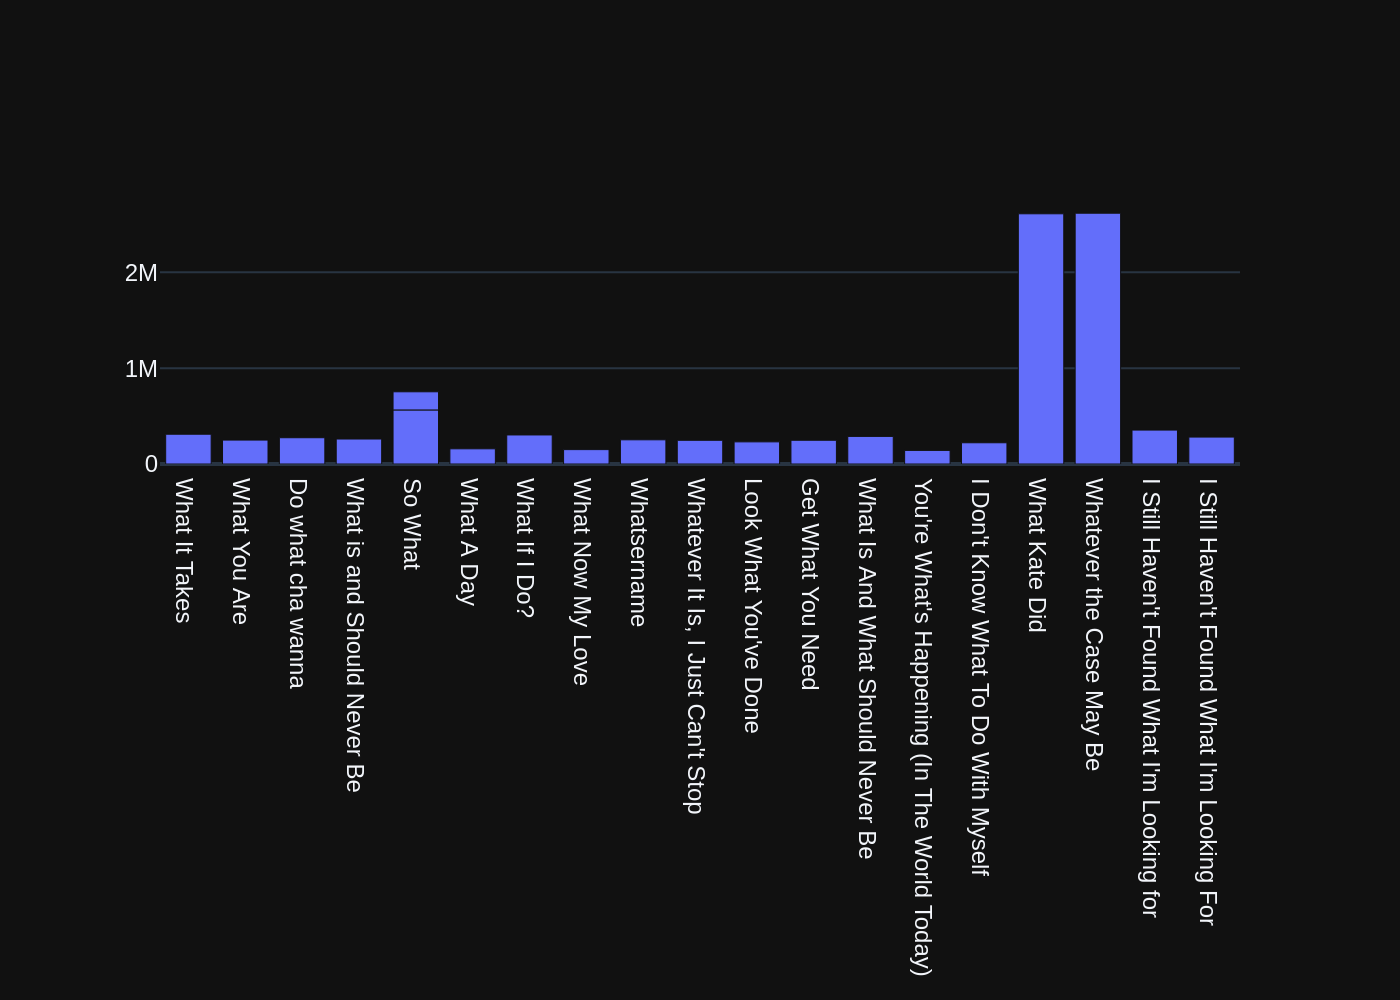





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(*) AS NumberOfInvoices FROM invoices GROUP BY CustomerId LIMIT 20


[( <DataFrame> )]
queried dataframe



CustomerId  NumberOfInvoices
0            1                 7
1            2                 7
2            3                 7
3            4                 7
4            5                 7
5            6                 7
6            7                 7
7            8                 7
8            9                 7
9           10                 7
10          11                 7
11          12                 7
12          13                 7
13          14                 7
14          15                 7
15          16                 7
16          17                 7
17          18                 7
18          19                 7
19          20                 7


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(name="Invoice Count", mode="number+delta", value=df['NumberOfInvoices'].values[0], title="Total Invoices")
else:
    fig = px.bar(df, x='CustomerId', y='NumberOfInvoices', title="Total Number of Invoices per Customer")

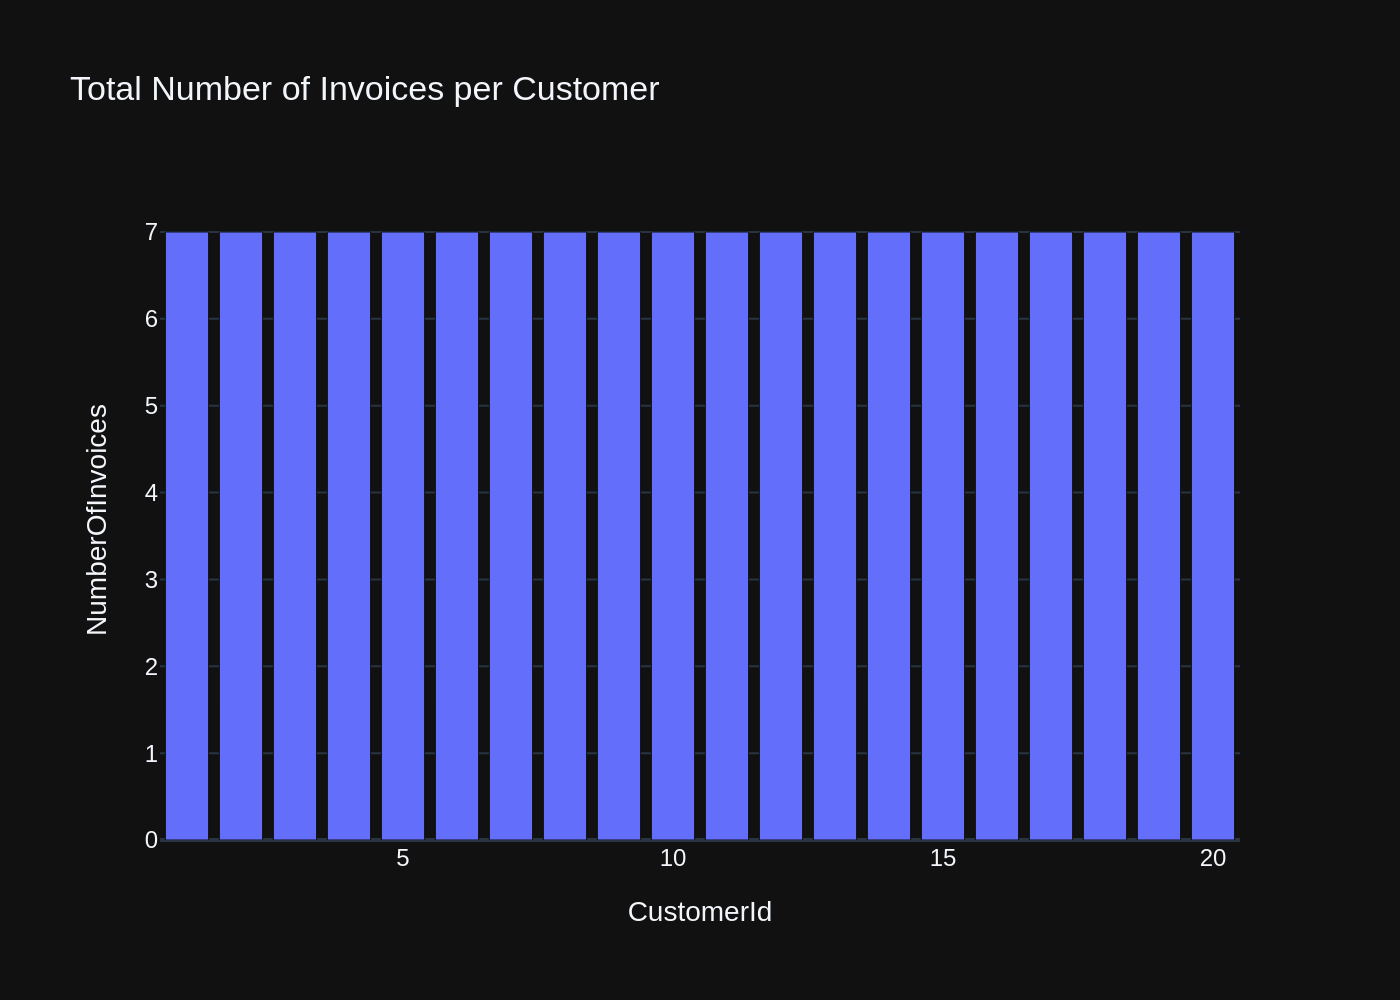





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT BillingCountry, COUNT(*) AS TotalInvoices FROM invoices GROUP BY BillingCountry LIMIT 20


[( <DataFrame> )]
queried dataframe



BillingCountry  TotalInvoices
0        Argentina              7
1        Australia              7
2          Austria              7
3          Belgium              7
4           Brazil             35
5           Canada             56
6            Chile              7
7   Czech Republic             14
8          Denmark              7
9          Finland              7
10          France             35
11         Germany             28
12         Hungary              7
13           India             13
14         Ireland              7
15           Italy              7
16     Netherlands              7
17          Norway              7
18          Poland              7
19        Portugal             14


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        title="Total Invoices",
        value=df['TotalInvoices'].values[0],
        number={'prefix': "Number of invoices: ", 'font_size': '28px'},
        gauge={
            'axis': {'range': [None, df['TotalInvoices'].max()]},
            'bar': {'color': "midnightblue"},
            'steps' : [
                {'range': [0, 10], 'label': "Low"},
                {'range': [10, 50], 'label': "Medium"},
                {'range': [50, df['TotalInvoices'].max()], 'label': "High"}
            ],
        }
    )
else:
    fig = px.bar(df, x='BillingCountry', y='TotalInvoices', title='Total Invoices per Country')

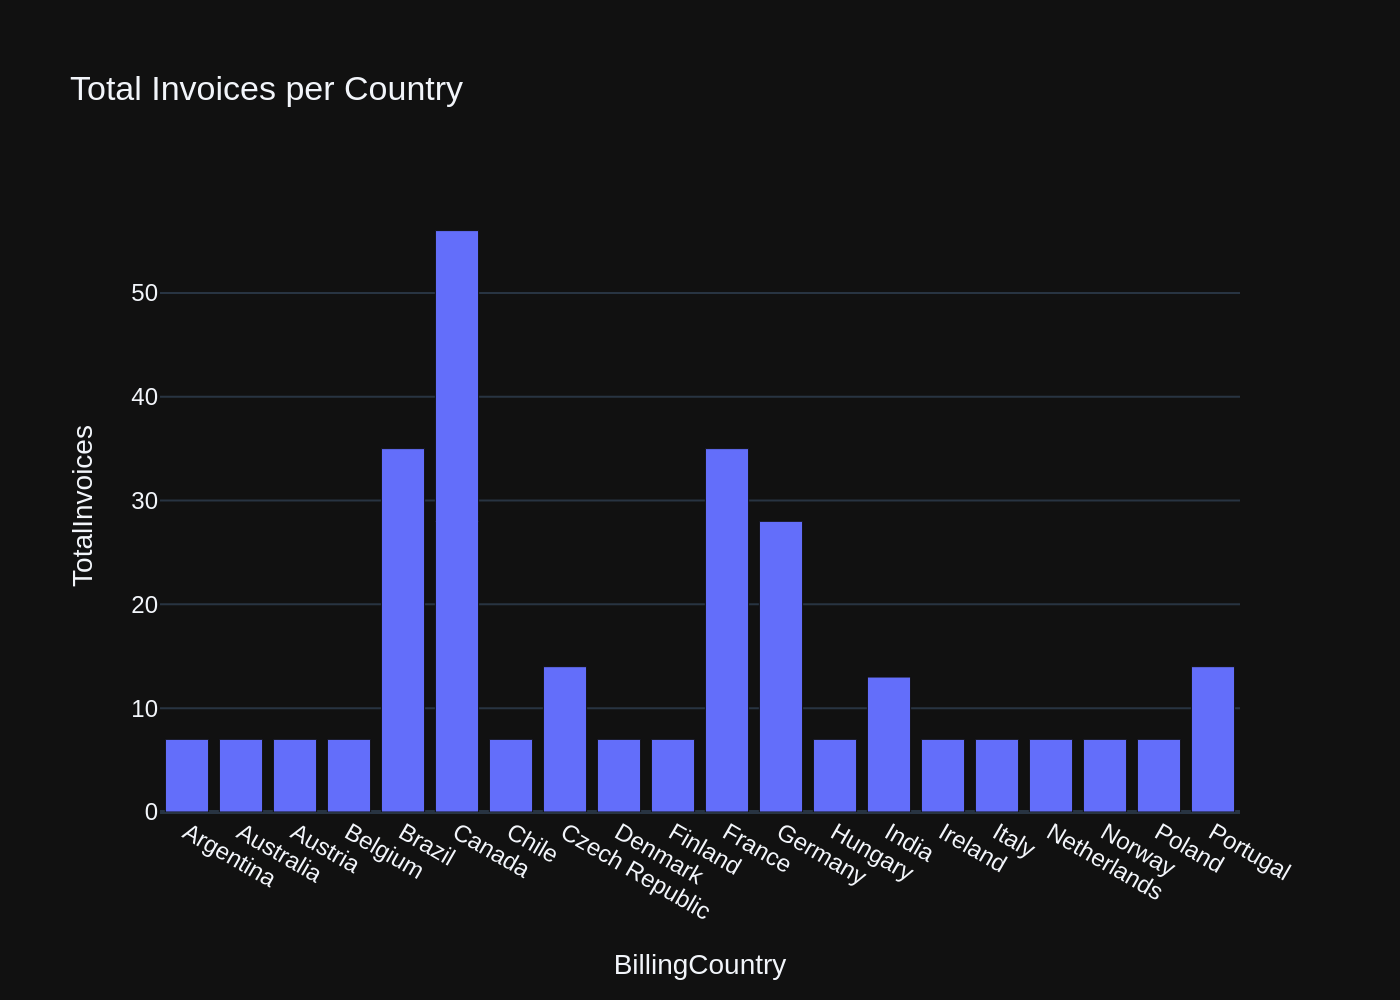





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM invoices WHERE Total > 10 LIMIT 20


[( <DataFrame> )]
queried dataframe



InvoiceId  CustomerId          InvoiceDate  \
0           5          23  2009-01-11 00:00:00   
1          12           2  2009-02-11 00:00:00   
2          19          40  2009-03-14 00:00:00   
3          26          19  2009-04-14 00:00:00   
4          33          57  2009-05-15 00:00:00   
5          40          36  2009-06-15 00:00:00   
6          47          15  2009-07-16 00:00:00   
7          54          53  2009-08-16 00:00:00   
8          61          32  2009-09-16 00:00:00   
9          68          11  2009-10-17 00:00:00   
10         75          49  2009-11-17 00:00:00   
11         82          28  2009-12-18 00:00:00   
12         88          57  2010-01-13 00:00:00   
13         89           7  2010-01-18 00:00:00   
14         96          45  2010-02-18 00:00:00   
15        103          24  2010-03-21 00:00:00   
16        110           3  2010-04-21 00:00:00   
17        117          41  2010-05-22 00:00:00   
18        124          20  2010-06-22 00:00:00   
19        131          58  2010-07-23 00:00:00   

                          BillingAddress     BillingCity BillingState  \
0                        69 Salem Street          Boston           MA   
1                Theodor-Heuss-Straße 34       Stuttgart         None   
2                         8, Rue Hanovre           Paris         None   
3                        1 Infinite Loop       Cupertino           CA   
4                        Calle Lira, 198        Santiago         None   
5                     Tauentzienstraße 8          Berlin         None   
6                    700 W Pender Street       Vancouver           BC   
7                           113 Lupus St          London         None   
8                     696 Osborne Street        Winnipeg           MB   
9                     Av. Paulista, 2022       São Paulo           SP   
10                          Ordynacka 10          Warsaw         None   
11                           302 S 700 E  Salt Lake City           UT   
12                       Calle Lira, 198        Santiago         None   
13  Rotenturmstraße 4, 1010 Innere Stadt          Vienne         None   
14                     Erzsébet krt. 58.        Budapest         None   
15                 162 E Superior Street         Chicago           IL   
16                     1498 rue Bélanger        Montréal           QC   
17                   11, Place Bellecour            Lyon         None   
18                  541 Del Medio Avenue   Mountain View           CA   
19                   12,Community Centre           Delhi         None   

    BillingCountry BillingPostalCode  Total  
0              USA              2113  13.86  
1          Germany             70174  13.86  
2           France             75002  13.86  
3              USA             95014  13.86  
4            Chile              None  13.86  
5          Germany             10789  13.86  
6           Canada           V6C 1G8  13.86  
7   United Kingdom          SW1V 3EN  13.86  
8           Canada           R3L 2B9  13.86  
9           Brazil         01310-200  13.86  
10          Poland            00-358  13.86  
11             USA             84102  13.86  
12           Chile              None  17.91  
13         Austria              1010  18.86  
14         Hungary            H-1073  21.86  
15             USA             60611  15.86  
16          Canada           H2G 1A7  13.86  
17          France             69002  13.86  
18             USA         94040-111  13.86  
19           India            110017  13.86


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    trace = go.Indicator(
        mode="number",
        value=df['Total'].iloc[0],
        title={'text': "Invoice Total"},
        number={'prefix': "$"}
    )
else:
    trace = go.Bar(
        x=df['InvoiceId'],
        y=df['Total'],
        name='Invoice Totals',
        marker=dict(color='blue')
    )

layout = go.Layout(title="Invoices with a Total Exceeding $10")

fig = go.Figure(data=[trace], layout=layout)

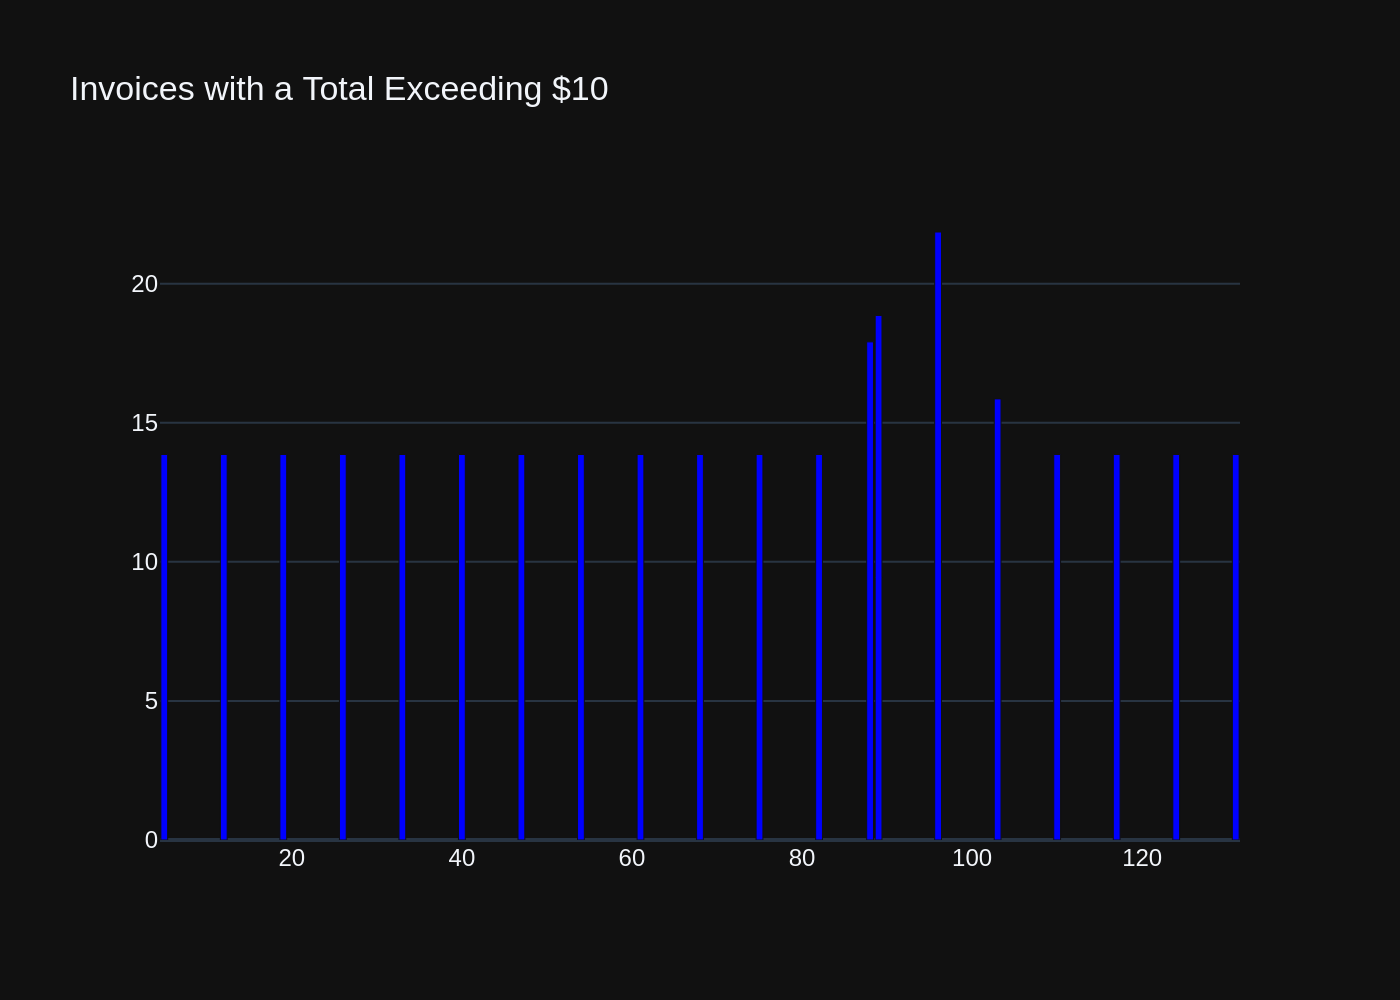





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceDate, SUM(Total) AS TotalAmount FROM invoices WHERE strftime('%Y', InvoiceDate) = '2010' GROUP BY InvoiceDate LIMIT 20


[( <DataFrame> )]
queried dataframe



InvoiceDate  TotalAmount
0   2010-01-08 00:00:00         3.96
1   2010-01-09 00:00:00         3.96
2   2010-01-10 00:00:00         6.94
3   2010-01-13 00:00:00        17.91
4   2010-01-18 00:00:00        18.86
5   2010-01-26 00:00:00         0.99
6   2010-02-08 00:00:00         3.96
7   2010-02-09 00:00:00         3.96
8   2010-02-10 00:00:00         5.94
9   2010-02-13 00:00:00         8.91
10  2010-02-18 00:00:00        21.86
11  2010-02-26 00:00:00         1.99
12  2010-03-11 00:00:00         7.96
13  2010-03-12 00:00:00         3.96
14  2010-03-13 00:00:00         5.94
15  2010-03-16 00:00:00         9.91
16  2010-03-21 00:00:00        15.86
17  2010-03-29 00:00:00         0.99
18  2010-04-11 00:00:00         3.96
19  2010-04-12 00:00:00         3.96


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalAmount'].values[0],
        number={'prefix': "$"}
    ))
else:
    fig = go.Figure(data=go.Scatter(
        x=df['InvoiceDate'],
        y=df['TotalAmount'],
        mode='lines+markers'
    ))

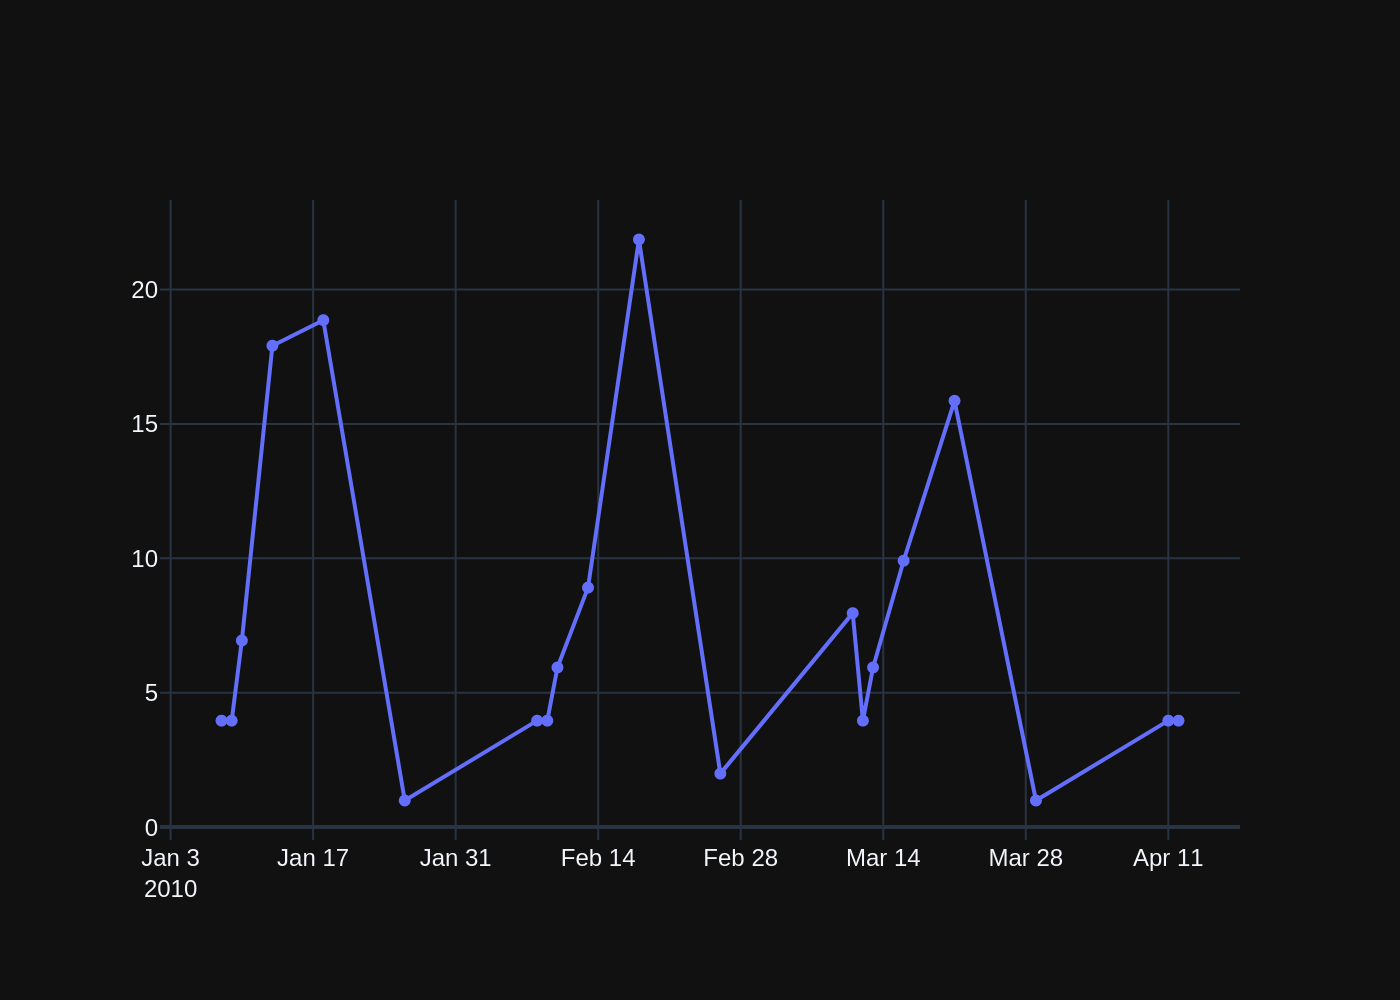





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT e.FirstName || ' ' || e.LastName AS Employee, m.FirstName || ' ' || m.LastName AS Manager FROM employees e LEFT JOIN employees m ON e.ReportsTo = m.EmployeeId LIMIT 20


[( <DataFrame> )]
queried dataframe



Employee           Manager
0      Andrew Adams              None
1     Nancy Edwards      Andrew Adams
2      Jane Peacock     Nancy Edwards
3     Margaret Park     Nancy Edwards
4     Steve Johnson     Nancy Edwards
5  Michael Mitchell      Andrew Adams
6       Robert King  Michael Mitchell
7    Laura Callahan  Michael Mitchell


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=df['Employee'][0],
        title={'text': "Employee"},
        gauge={
            'axis': {'range': [None, None]},
            'bar': {'color': "blue"},
            'steps' : [
                {'range': [0, 1], 'color': "lightgray"}
            ]
        }
    ))
else:
    fig = go.Figure(data=[go.Table(
        header=dict(values=["Employee", "Manager"]),
        cells=dict(values=[df['Employee'], df['Manager']])
    )])

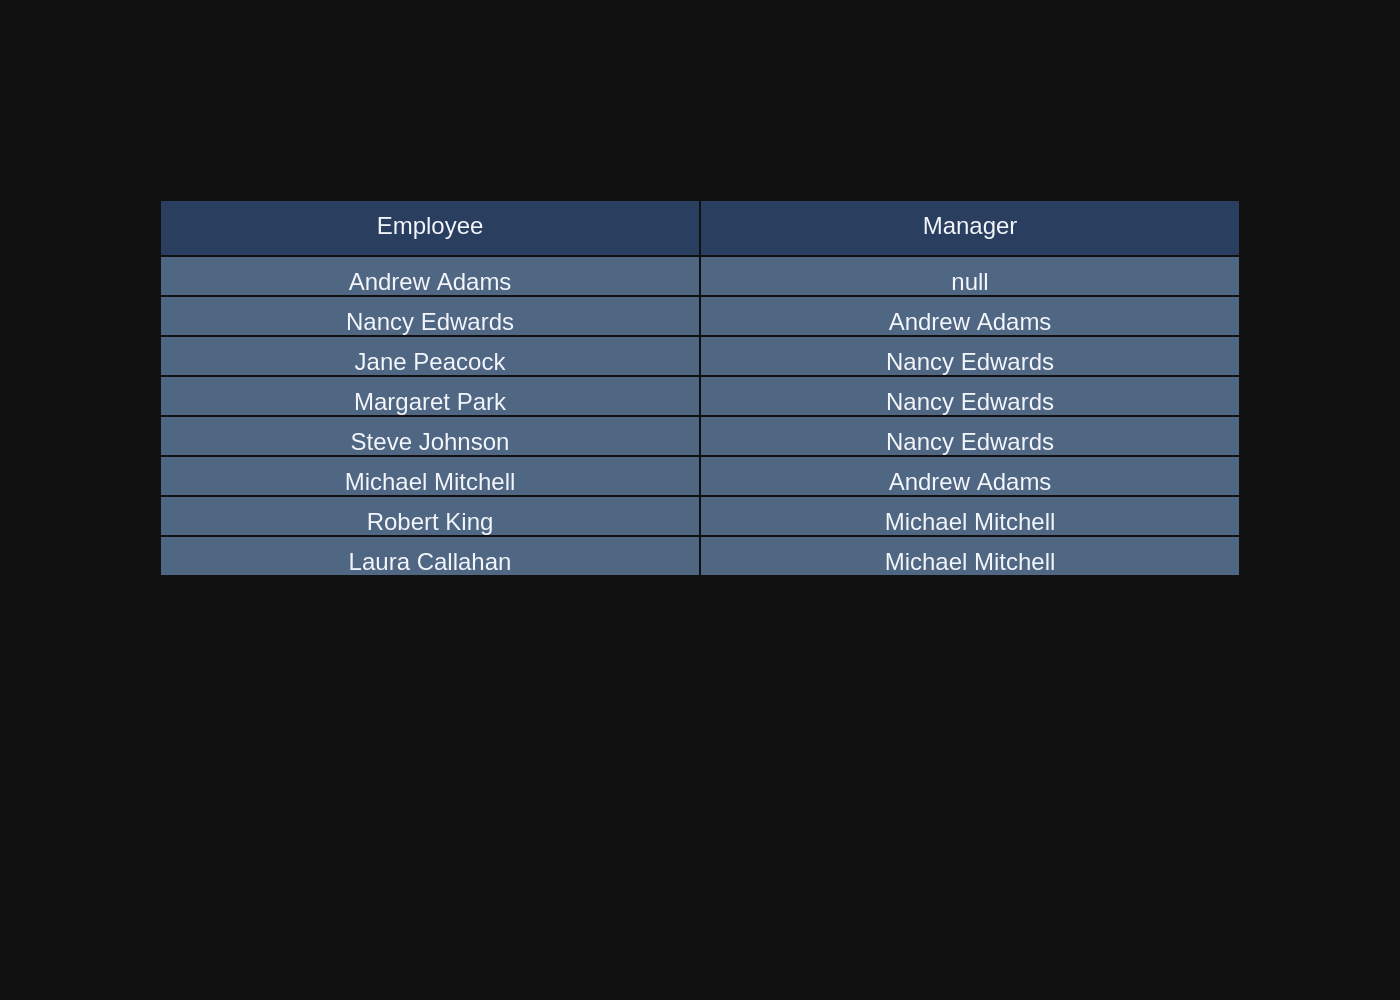





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, AVG(Total) AS AverageInvoiceTotal FROM invoices GROUP BY CustomerId LIMIT 20


[( <DataFrame> )]
queried dataframe



CustomerId  AverageInvoiceTotal
0            1             5.660000
1            2             5.374286
2            3             5.660000
3            4             5.660000
4            5             5.802857
5            6             7.088571
6            7             6.088571
7            8             5.374286
8            9             5.374286
9           10             5.374286
10          11             5.374286
11          12             5.374286
12          13             5.374286
13          14             5.374286
14          15             5.517143
15          16             5.374286
16          17             5.660000
17          18             5.374286
18          19             5.517143
19          20             5.660000


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['AverageInvoiceTotal'].values[0],
        title={"text": "Average Invoice Total"},
        number={'prefix': "$"}
    ))
else:
    fig = go.Figure(data=[go.Bar(
        x=df['CustomerId'],
        y=df['AverageInvoiceTotal'],
        marker_color='blue'
    )])

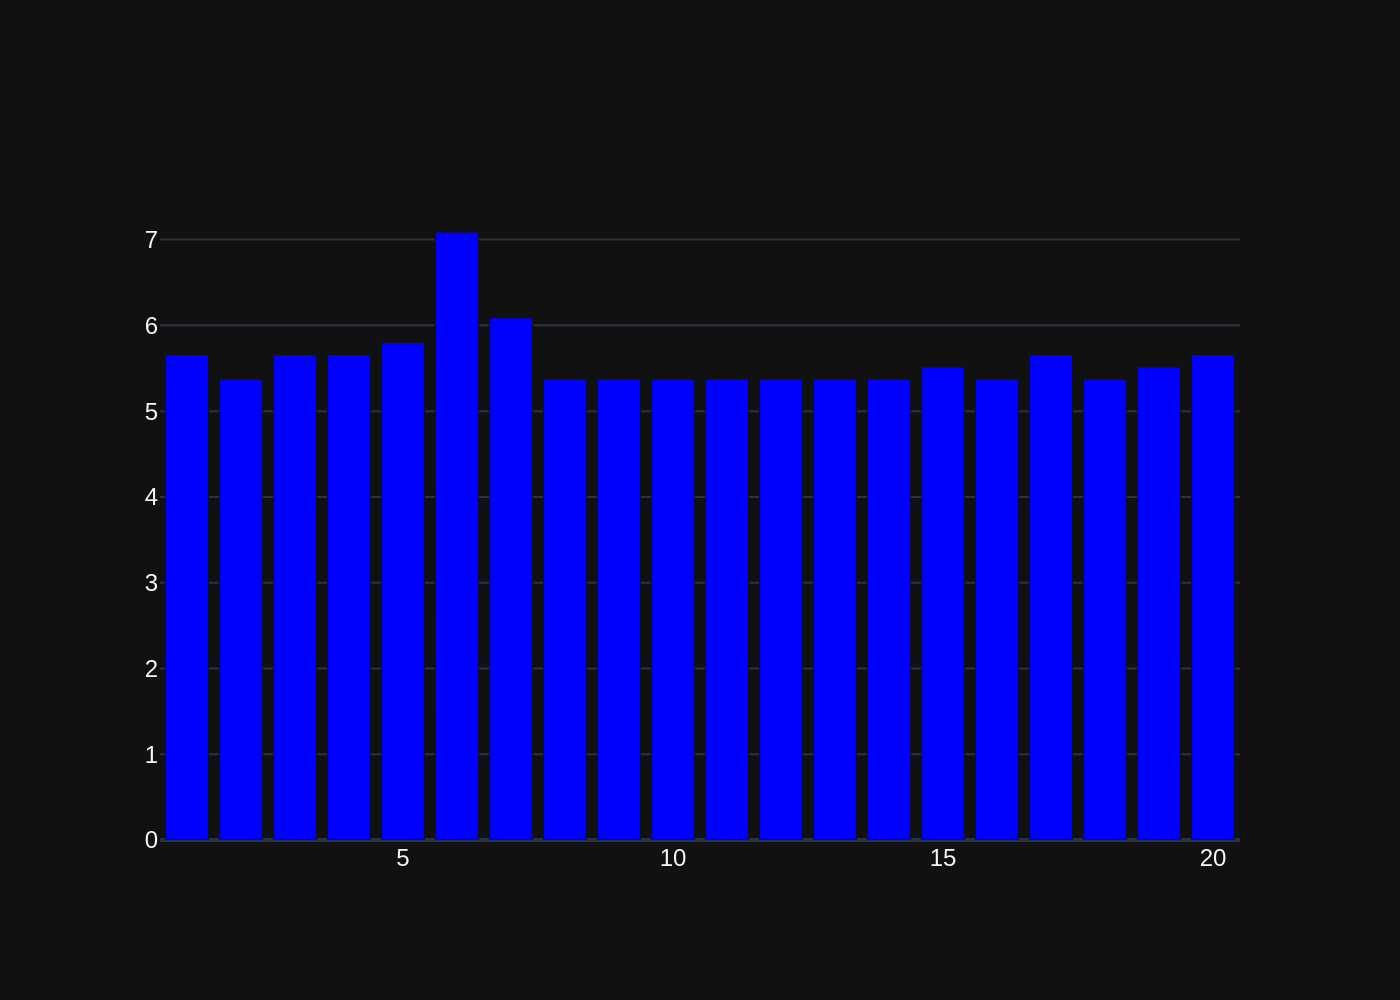





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name, UnitPrice FROM tracks ORDER BY UnitPrice DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



Name  UnitPrice
0  Battlestar Galactica: The Story So Far       1.99
1                  Occupation / Precipice       1.99
2                           Exodus, Pt. 1       1.99
3                           Exodus, Pt. 2       1.99
4                           Collaborators       1.99


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(name=df['Name'][0], value=df['UnitPrice'][0])
else:
    fig = px.bar(df, x='Name', y='UnitPrice', title='Top 5 Most Expensive Tracks')

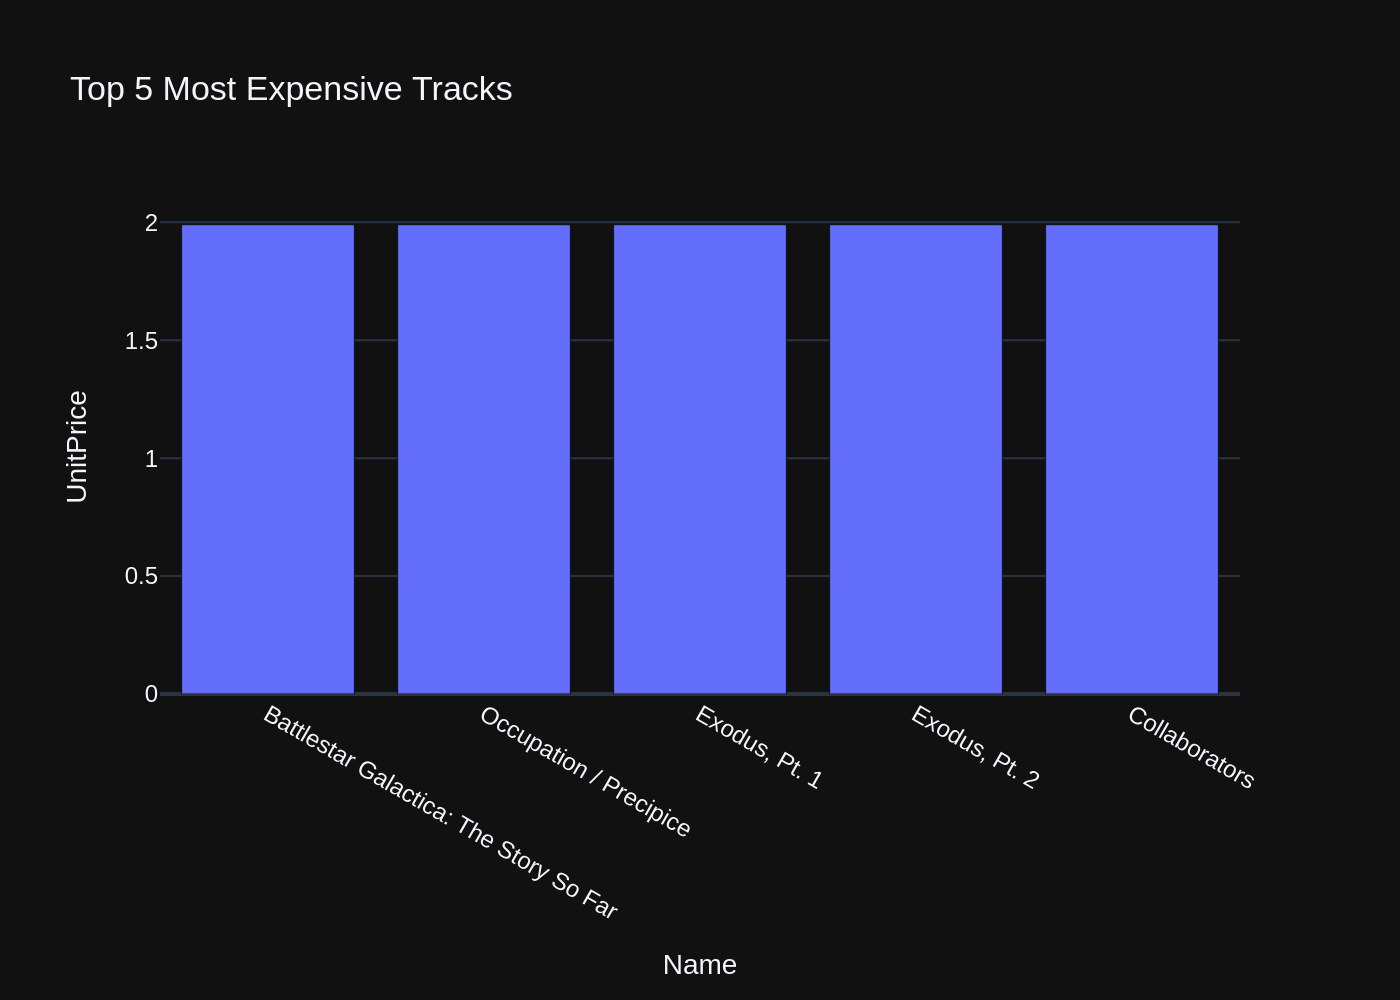





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Name, COUNT(T2.GenreId) AS NumberOfTracks FROM genres AS T1 INNER JOIN tracks AS T2 ON T1.GenreId = T2.GenreId GROUP BY T1.Name LIMIT 20


[( <DataFrame> )]
queried dataframe



Name  NumberOfTracks
0          Alternative              40
1   Alternative & Punk             332
2                Blues              81
3           Bossa Nova              15
4            Classical              74
5               Comedy              17
6                Drama              64
7       Easy Listening              24
8    Electronica/Dance              30
9          Heavy Metal              28
10         Hip Hop/Rap              35
11                Jazz             130
12               Latin             579
13               Metal             374
14               Opera               1
15                 Pop              48
16            R&B/Soul              61
17              Reggae              58
18                Rock            1297
19       Rock And Roll              12


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    trace = go.Indicator(
        mode="number",
        value=df['NumberOfTracks'].values[0],
        title={'text': f"Number of Tracks in {df['Name'].values[0]}"},
        number={'font_size': 40}
    )
else:
    trace = go.Bar(
        x=df['Name'],
        y=df['NumberOfTracks'],
        marker=dict(color='blue')
    )

layout = go.Layout(title="Number of Tracks per Genre")

fig = go.Figure(data=[trace], layout=layout)

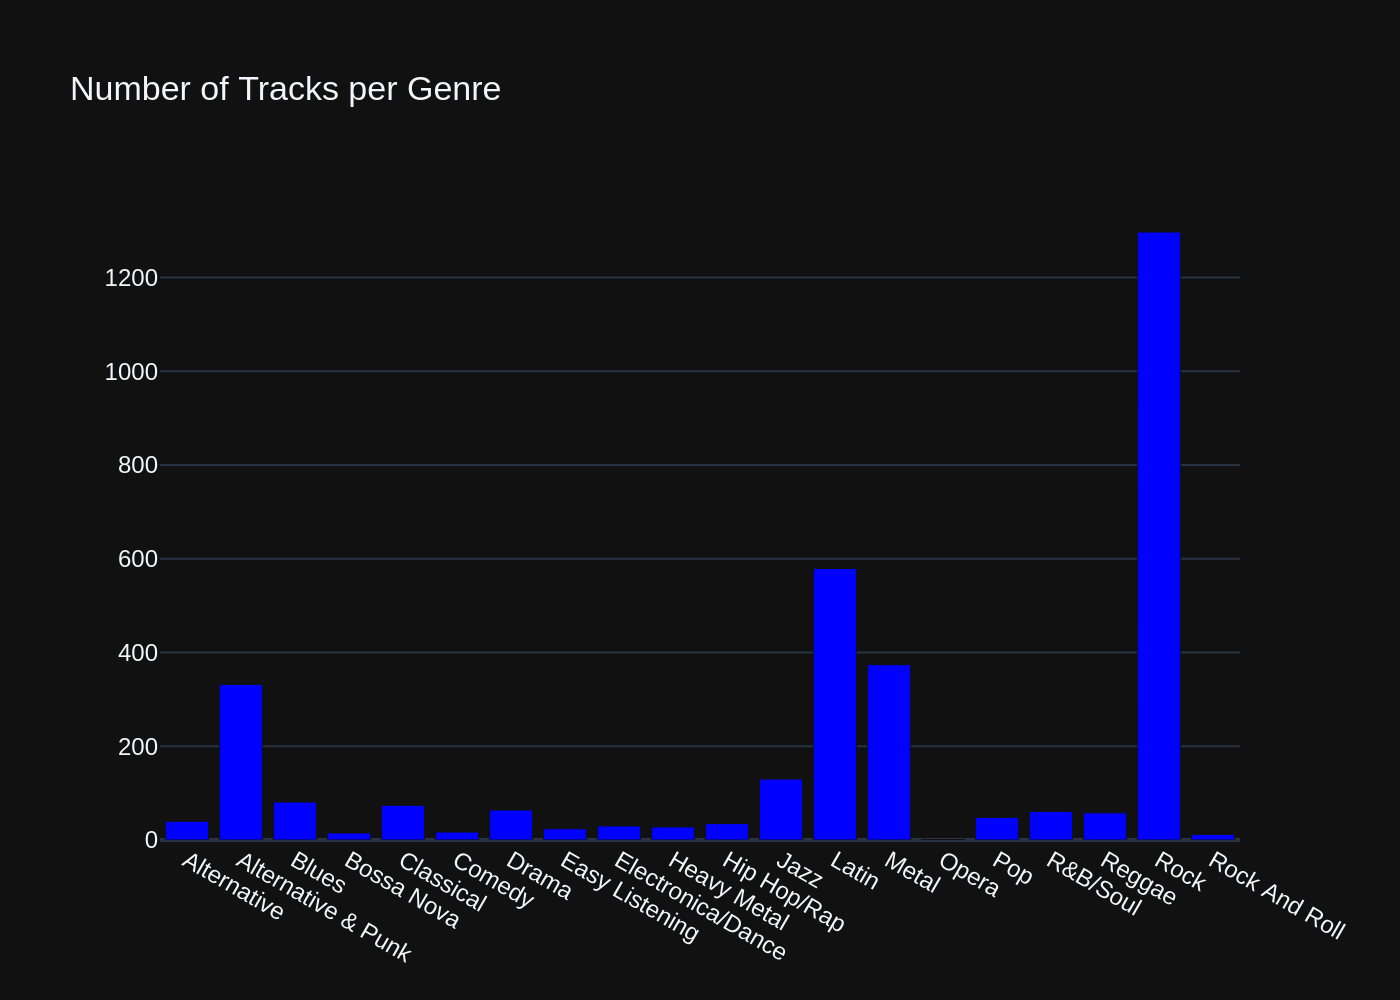





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN ( SELECT DISTINCT GenreId FROM tracks ) LIMIT 20


[( <DataFrame> )]
queried dataframe



Empty DataFrame
Columns: [Name]
Index: []





# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN ( SELECT CustomerId FROM invoices ) LIMIT 20


[( <DataFrame> )]
queried dataframe



Empty DataFrame
Columns: [FirstName, LastName]
Index: []





# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Name, COUNT(T2.TrackId) AS NumberOfTracks FROM artists AS T1 INNER JOIN albums AS T2 ON T1.ArtistId = T2.ArtistId INNER JOIN tracks AS T3 ON T2.AlbumId = T3.AlbumId GROUP BY T1.Name ORDER BY NumberOfTracks DESC LIMIT 10


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Name, COUNT(T3.AlbumID) AS NumberOfTracks FROM artists AS T1 INNER JOIN albums AS T2 ON T1.ArtistId = T2.ArtistId INNER JOIN tracks AS T3 ON T2.AlbumId = T3.AlbumId GROUP BY T1.Name ORDER BY NumberOfTracks DESC LIMIT 10


[( <DataFrame> )]
queried dataframe



Name  NumberOfTracks
0      Iron Maiden             213
1               U2             135
2     Led Zeppelin             114
3        Metallica             112
4             Lost              92
5      Deep Purple              92
6        Pearl Jam              67
7    Lenny Kravitz              57
8  Various Artists              56
9       The Office              53


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        title='Top Artist',
        value=df['NumberOfTracks'][0],
        mode='number+delta',
        number={'font_size': 40},
        delta={'reference': df['NumberOfTracks'][0] - 1}
    )
else:
    fig = px.bar(df, x='Name', y='NumberOfTracks', title='Top 10 Most Popular Artists')

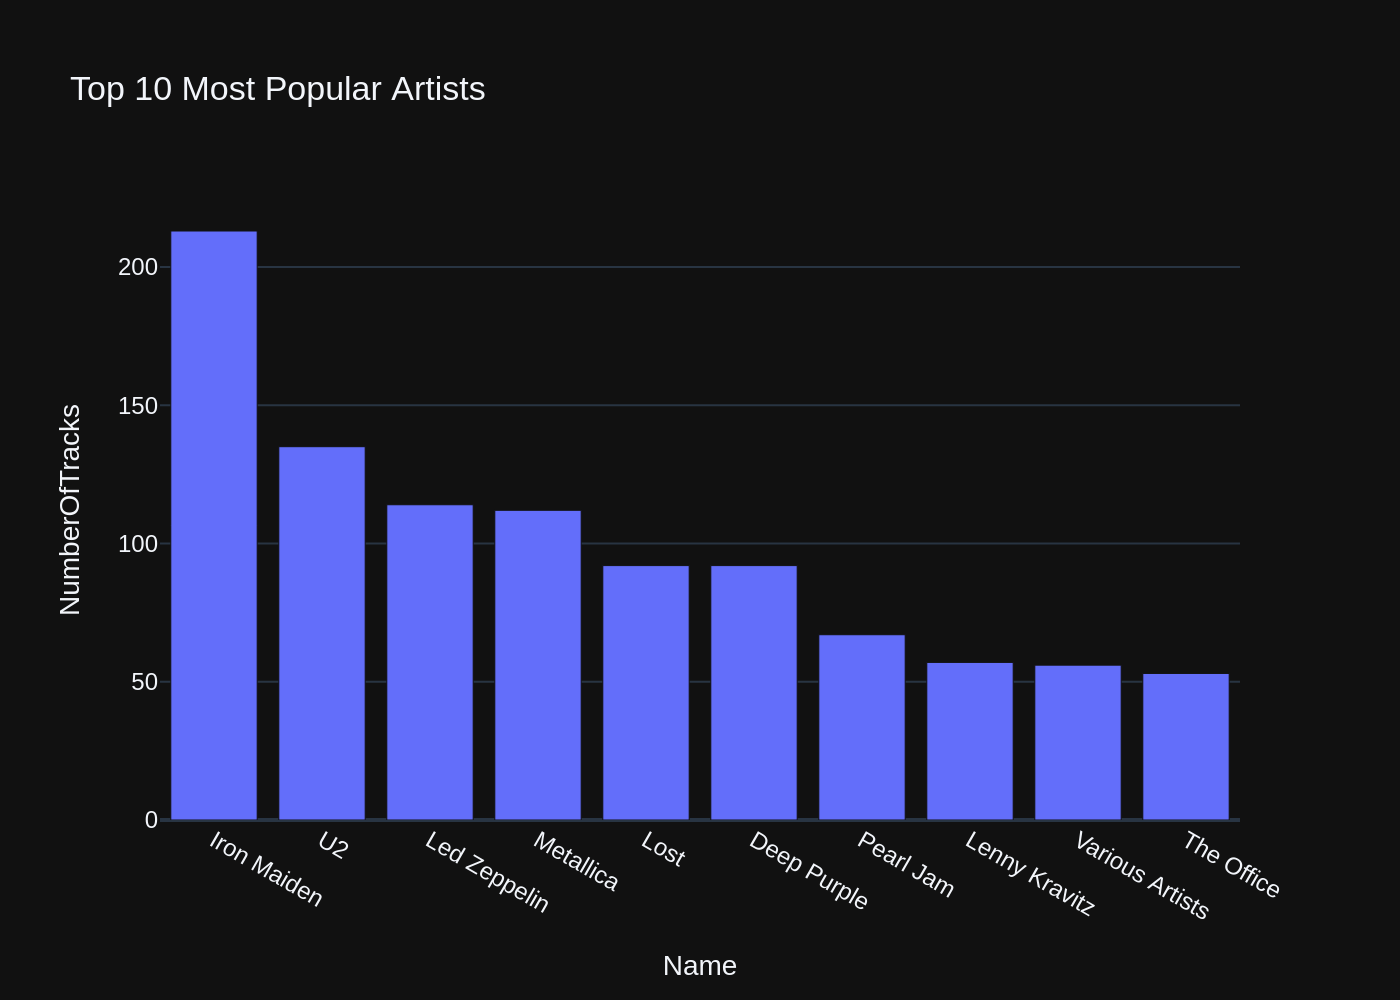





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName || ' ' || LastName AS FullName, Email FROM customers WHERE Country = 'Canada' LIMIT 20


[( <DataFrame> )]
queried dataframe



FullName                   Email
0  François Tremblay     ftremblay@gmail.com
1       Mark Philips      mphilips12@shaw.ca
2  Jennifer Peterson     jenniferp@rogers.ca
3       Robert Brown        robbrown@shaw.ca
4     Edward Francis     edfrancis@yachoo.ca
5        Martha Silk    marthasilk@gmail.com
6     Aaron Mitchell  aaronmitchell@yahoo.ca
7     Ellie Sullivan  ellie.sullivan@shaw.ca


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None



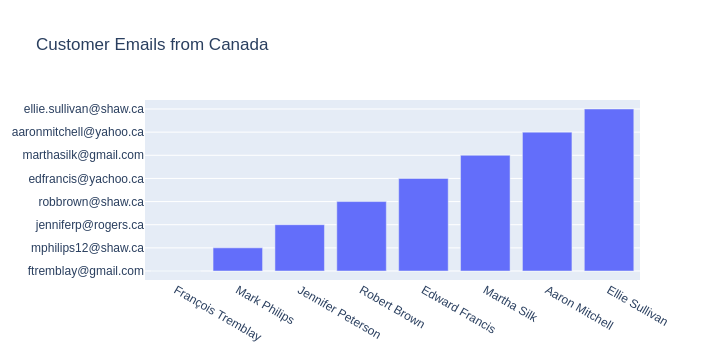


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    trace = go.Indicator(
        mode="number",
        value=df['Email'][0],
        title={'text': "Customer Email"}
    )
else:
    traces = [go.Bar(x=df['FullName'], y=df['Email'])]
    layout = go.Layout(title='Customer Emails from Canada')
    fig = go.Figure(data=traces, layout=layout)
    trace = fig

plotly.offline.iplot(trace)

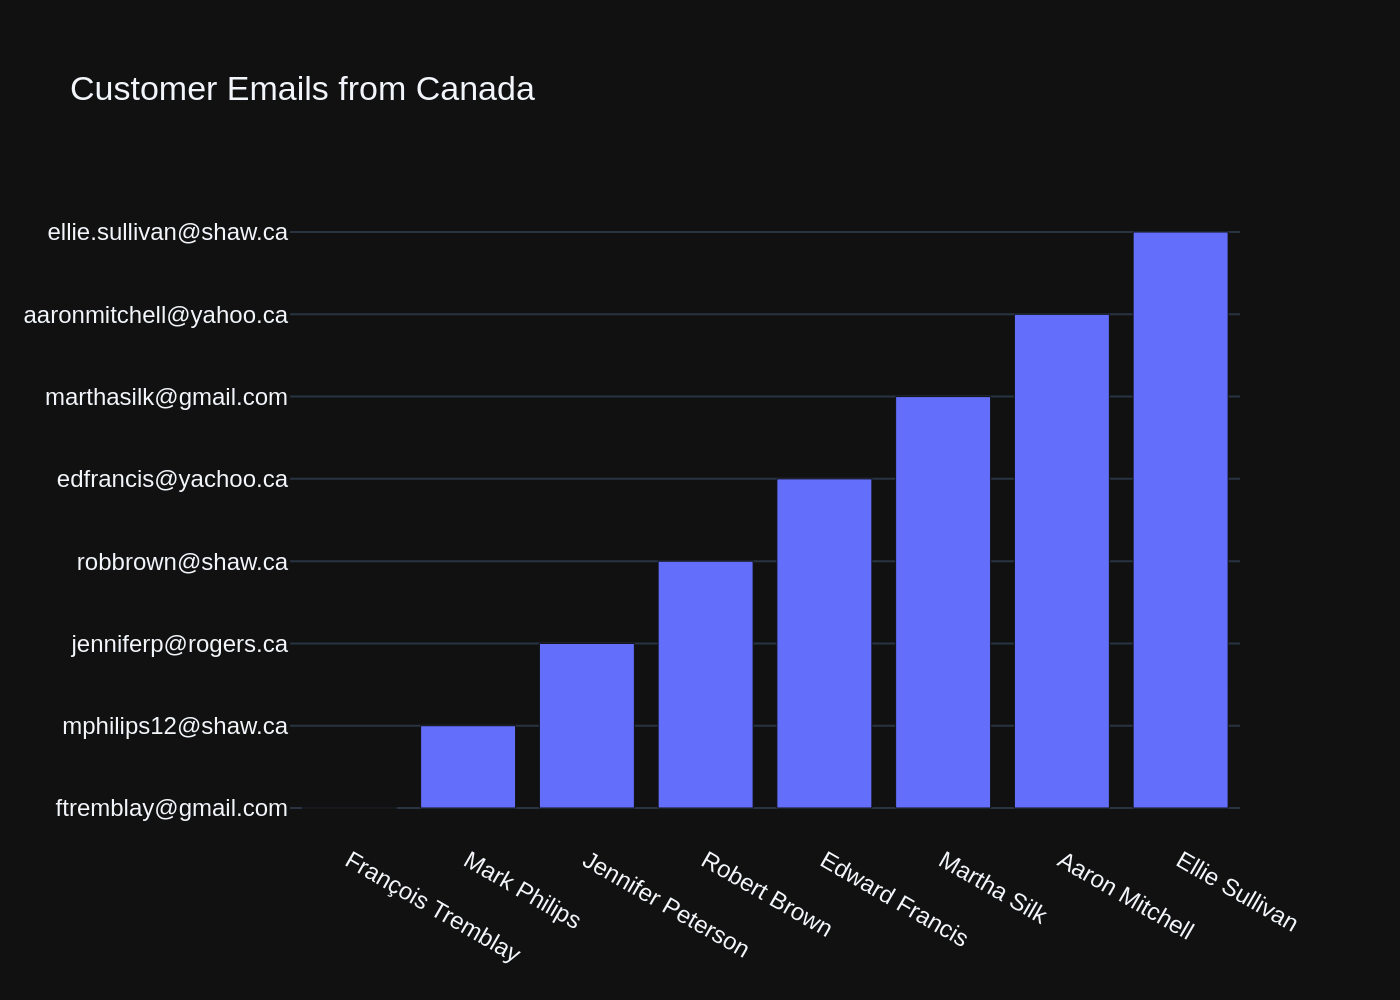





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, COUNT(i.InvoiceId) AS NumberOfInvoices FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId ORDER BY NumberOfInvoices DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



FirstName   LastName  NumberOfInvoices
0      Luís  Gonçalves                 7


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['NumberOfInvoices'].values[0],
        title={'text': f"Number of Invoices: {df['FirstName'].values[0]} {df['LastName'].values[0]}"}
    ))
else:
    fig = go.Figure(data=go.Bar(x=df['FirstName'], y=df['NumberOfInvoices'], text=df['NumberOfInvoices'],
                                 marker_color='blue'))

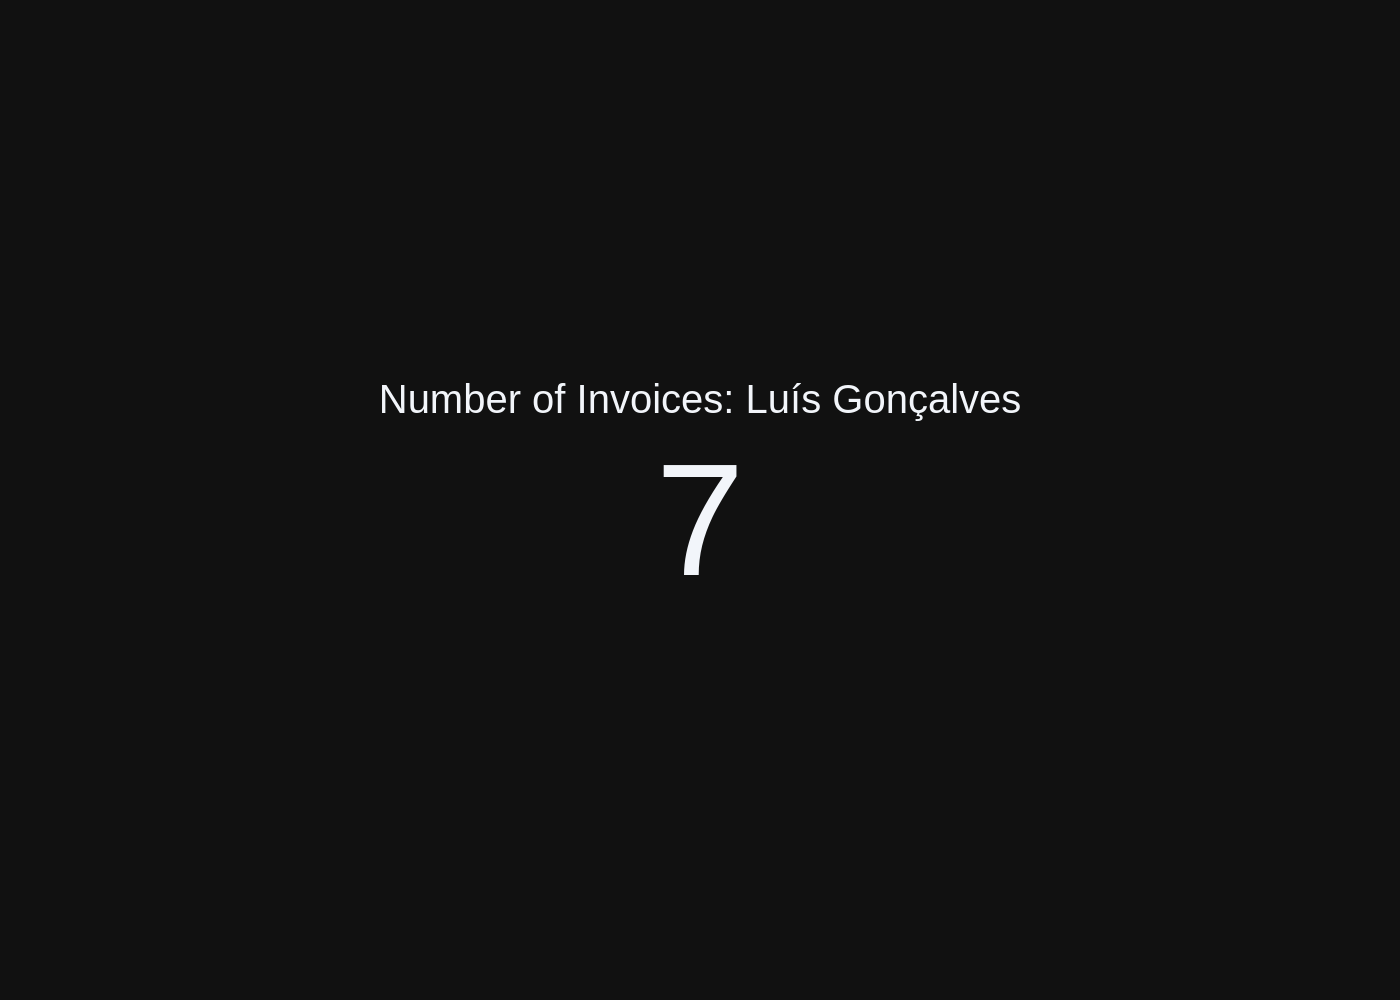





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, SUM(i.Quantity) as TotalQuantity FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId JOIN invoice_items AS ii ON i.InvoiceId = ii.InvoiceId WHERE ii.UnitPrice > 10 GROUP BY c.CustomerId ORDER BY TotalQuantity DESC LIMIT 1


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.FirstName, T2.LastName, SUM(T3.Quantity) as TotalQuantity FROM invoices AS T1 JOIN customers AS T2 ON T1.CustomerId = T2.CustomerId JOIN invoice_items AS T3 ON T1.InvoiceId = T3.InvoiceId GROUP BY T2.CustomerId ORDER BY TotalQuantity DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



FirstName   LastName  TotalQuantity
0      Luís  Gonçalves             38


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    trace = go.Indicator(
        mode="number",
        value=df['TotalQuantity'].values[0],
        number={'prefix': "Total Albums Bought: "},
    )
else:
    trace = go.Bar(
        x=df['LastName'],
        y=df['TotalQuantity'],
        marker=dict(color='blue')
    )

layout = go.Layout(title='Customer with the Most Albums Bought')

fig = go.Figure(data=[trace], layout=layout)

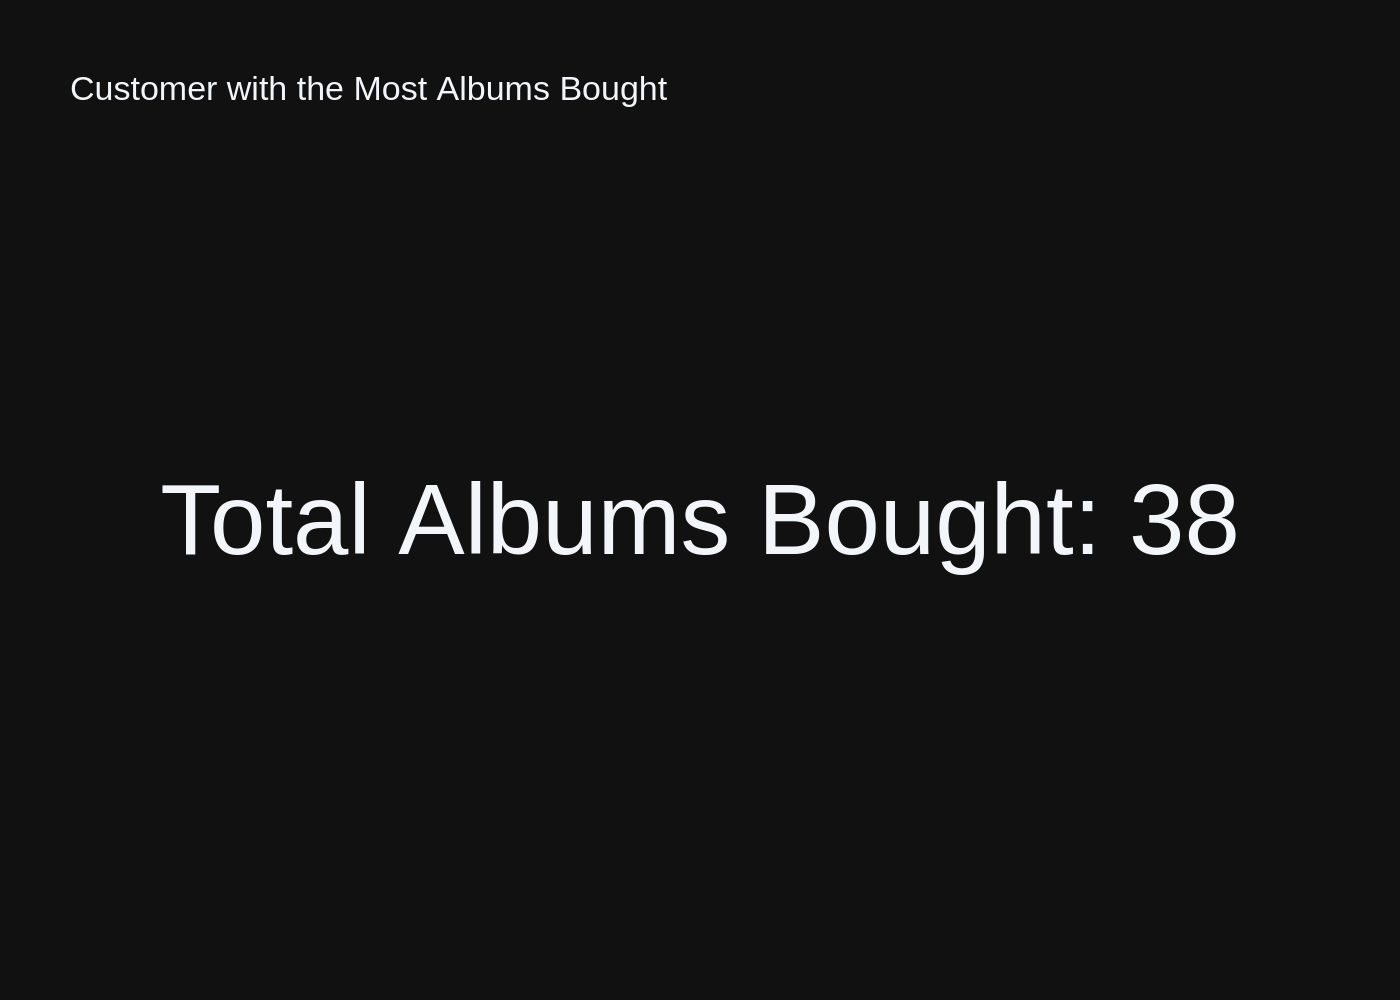





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.FirstName, T2.LastName, SUM(T3.Quantity) as TotalQuantity FROM invoices AS T1 JOIN customers AS T2 ON T1.CustomerId = T2.CustomerId JOIN invoice_items AS T3 ON T1.InvoiceId = T3.InvoiceId GROUP BY T2.CustomerId ORDER BY TotalQuantity DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



FirstName     LastName  TotalQuantity
0       Luís    Gonçalves             38
1     Leonie       Köhler             38
2   François     Tremblay             38
3      Bjørn       Hansen             38
4  František  Wichterlová             38


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    go.Figure(go.Indicator(
        mode="number",
        value=df['TotalQuantity'].iloc[0],
        number={'prefix': "Albums Bought: ", 'font': {'size': 24}},
        domain={'x': [0, 1], 'y': [0, 1]}
    )).show()
else:
    fig = go.Figure(go.Bar(
        x=df['FirstName'] + ' ' + df['LastName'],
        y=df['TotalQuantity'],
        marker_color='indianred'
    ))
    fig.update_layout(title_text="Top 5 Customers by Albums Bought")

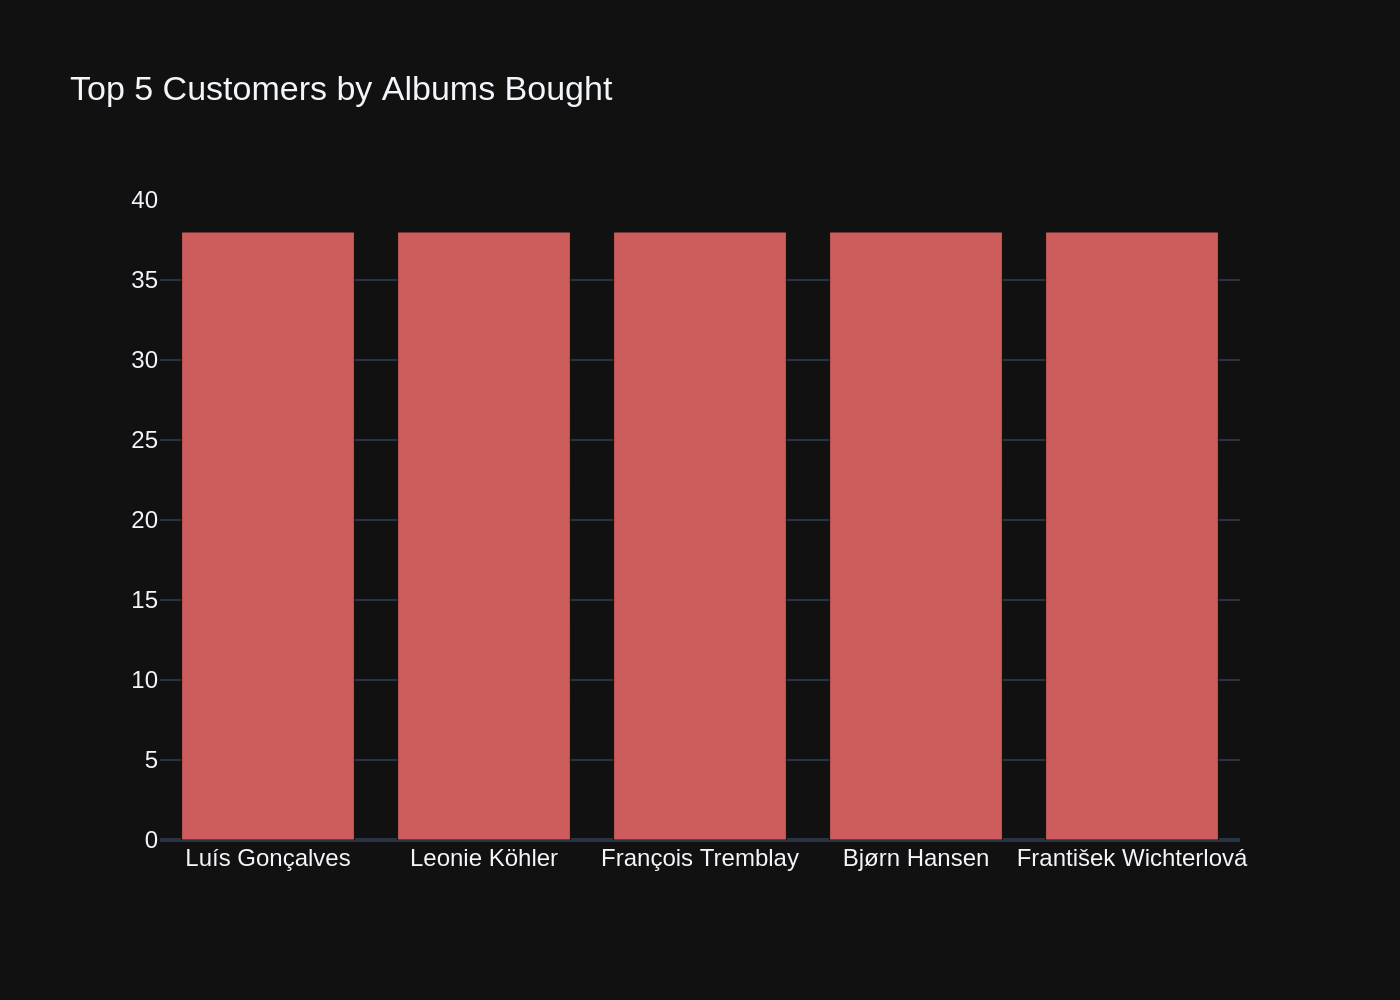





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, SUM(i.Total) as TotalSpent FROM customers AS c JOIN invoices AS i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId ORDER BY TotalSpent DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



FirstName    LastName  TotalSpent
0    Helena        Holý       49.62
1   Richard  Cunningham       47.62
2      Luis       Rojas       46.62
3  Ladislav      Kovács       45.62
4      Hugh    O'Reilly       45.62


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalSpent'].iloc[0],
        title={'text': f"Top Customer's Total Spent: ${df['TotalSpent'].iloc[0]:,.2f}"}
    ))
else:
    fig = go.Figure(data=[go.Bar(
        x=df['LastName'] + ' ' + df['FirstName'],
        y=df['TotalSpent']
    )])

fig.update_layout(title='Top 5 Customers by Total Spent')

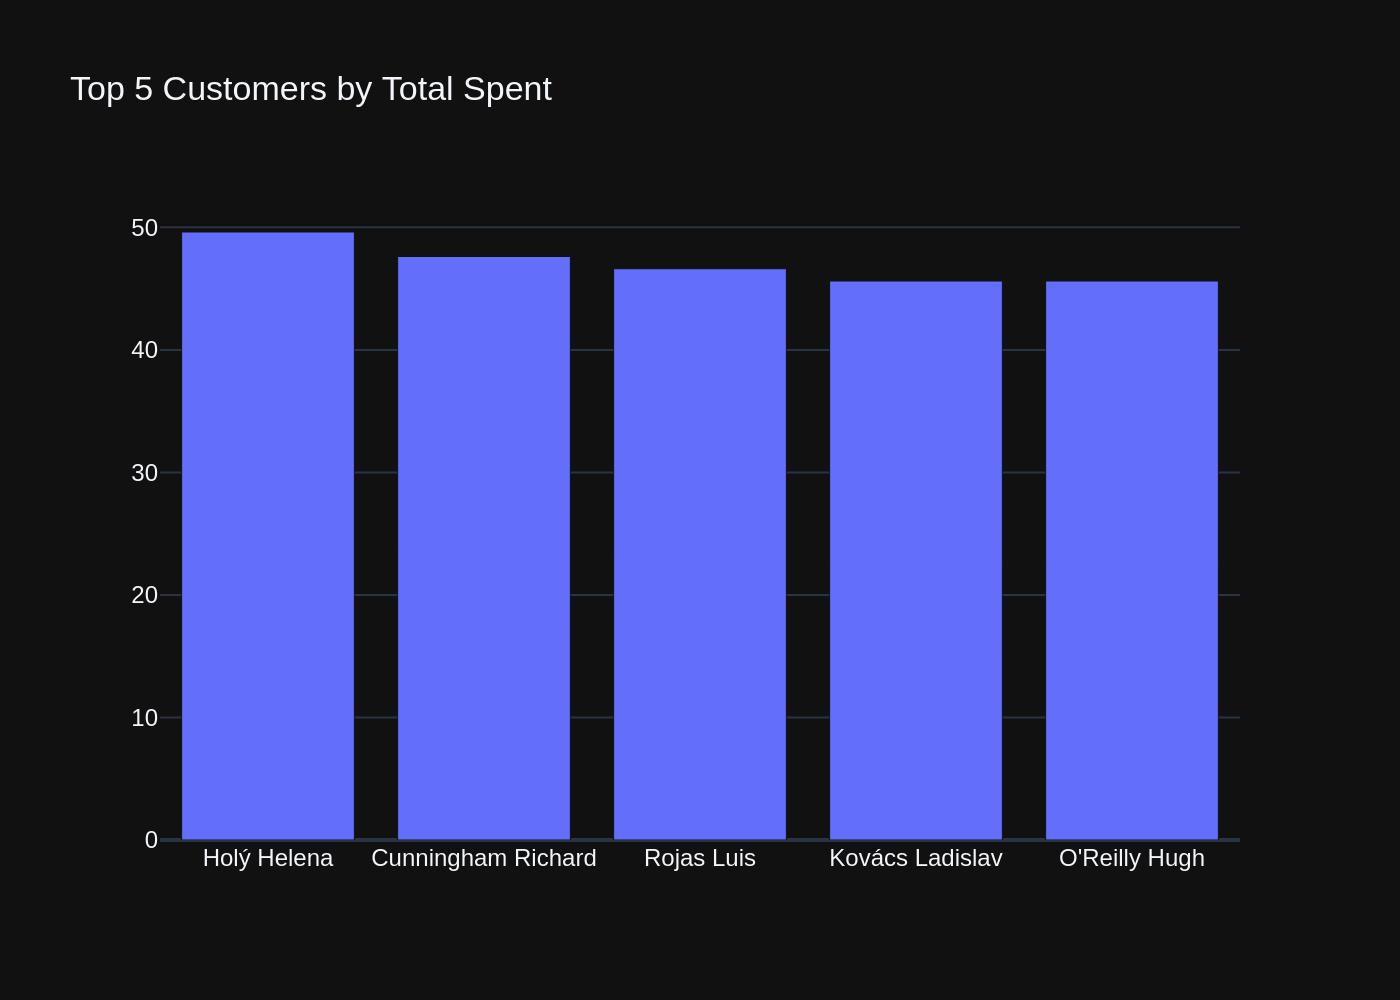





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Name, SUM(T3.Milliseconds) / 60000 AS TotalDurationMinutes FROM playlists AS T1 INNER JOIN playlist_track AS T2 ON T1.PlaylistId = T2.PlaylistId INNER JOIN tracks AS T3 ON T2.TrackId = T3.TrackId GROUP BY T1.PlaylistId HAVING COUNT(T2.TrackId) >= 10


[( <DataFrame> )]
queried dataframe



Name  TotalDurationMinutes
0                        Music                 14628
1                     TV Shows                  8351
2                   90’s Music                  6645
3                        Music                 14628
4                     TV Shows                  8351
5              Brazilian Music                   158
6                    Classical                   362
7    Classical 101 - Deep Cuts                   112
8   Classical 101 - Next Steps                   126
9   Classical 101 - The Basics                   123
10                      Grunge                    68
11         Heavy Metal Classic                   136


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(
        title="Total Duration of Tracks",
        value=df['TotalDurationMinutes'].values[0],
        number_format=".2f",
        domain={'x': [0.2, 0.8], 'y': [0.2, 0.8]},
    )
else:
    fig = px.bar(
        df,
        x='Name',
        y='TotalDurationMinutes',
        title="Total Duration of Tracks in Playlists",
        labels={'TotalDurationMinutes': 'Total Duration (Minutes)'},
        text_auto=True,
    )

fig.update_layout(paper_bgcolor="#f8f9fa")

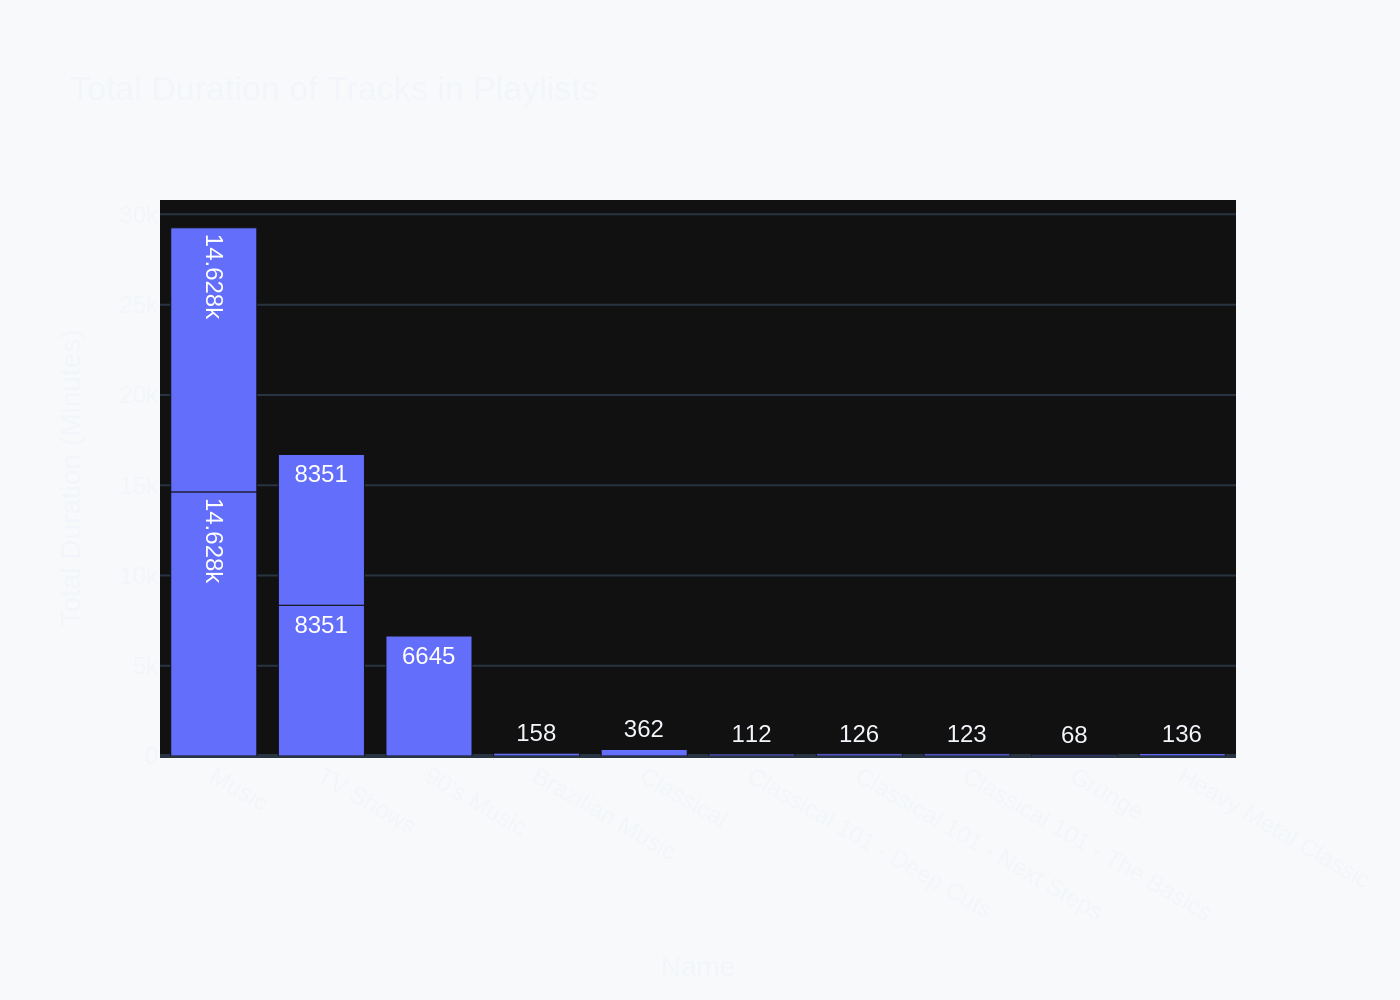





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Name FROM artists AS T1 INNER JOIN albums AS T2 ON T1.ArtistId = T2.ArtistId INNER JOIN tracks AS T3 ON T2.AlbumId = T3.AlbumId WHERE T3.GenreId IN ( SELECT GenreId FROM tracks GROUP BY GenreId HAVING COUNT(DISTINCT AlbumId) > 1 ) LIMIT 20


[( <DataFrame> )]
queried dataframe



Name
0    AC/DC
1    AC/DC
2    AC/DC
3    AC/DC
4    AC/DC
5    AC/DC
6    AC/DC
7    AC/DC
8    AC/DC
9    AC/DC
10   AC/DC
11   AC/DC
12   AC/DC
13   AC/DC
14   AC/DC
15   AC/DC
16   AC/DC
17   AC/DC
18  Accept
19  Accept


Ollama parameters:
model=qwen2.5-coder:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['Name'],
        title={'text': "Artist"}
    ))
else:
    fig = px.bar(df, x='Name', y='count', title='Artists with Albums in Multiple Genres')

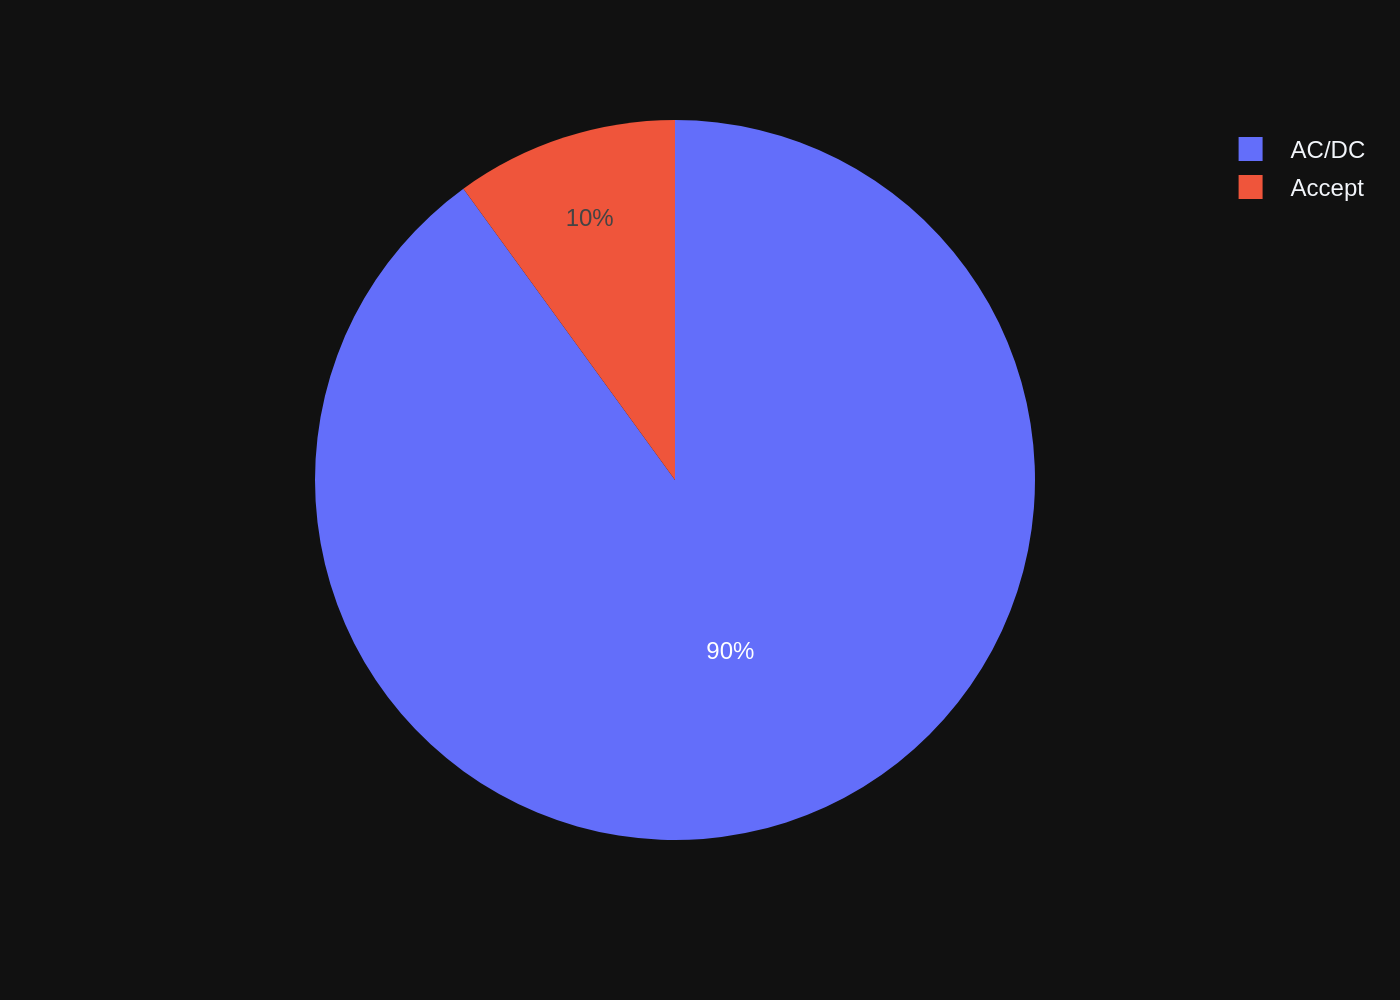

In [15]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [20]:
elapsed_time

169.40062761306763

In [16]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'qwen2.5-coder' 
 took 169 sec
 run on 'papa-game' 
 at 20241115-234702


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-qwen2.5-coder-169s-papa-game-20241115-234702.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

id  \
0   043f0802-2d5a-51e2-9389-dcb4e774f4d0-sql   
1   05cf6aab-30a9-5fd2-bf90-943b0a7f08c6-sql   
2   15aac60e-cb46-5006-b812-57ce43a744d4-sql   
3   198be005-3d10-5b95-8e39-9a73ae76e6bc-sql   
4   1e21a9ef-b5c5-5756-9512-012bd52ba828-sql   
5   2e0b40fc-8683-5255-9930-83b6708ae0b6-sql   
6   2f4771cd-5fb2-5c41-b474-82b3201e4ea0-sql   
7   338220d2-e7c5-50c2-a789-f05be94770c6-sql   
8   3497e46f-9294-5380-8363-8234687dd5a6-sql   
9   3573cc12-226d-594d-b18e-59b7a60974e9-sql   
10  3d92cf57-380e-57d8-8389-97f088239f99-sql   
11  4f13bc73-ff2d-59b9-a6a1-3327d5505e7b-sql   
12  6b30401c-4178-5d83-83da-c8846995fc59-sql   
13  94534b51-85ea-56f1-b2c9-23741c941085-sql   
14  9f52b00e-4ebd-5eda-b218-51645a2fbdc1-sql   
15  a3146099-61f5-5038-a674-df567fd9ffe0-sql   
16  bdd113a2-2f56-5596-8d4b-e8e733f5cd4b-sql   
17  df67ac5f-96e6-5809-bfd1-cf71a41cbf4f-sql   
18  e1d734aa-c25e-5bf8-bdb2-f4bad01060a8-sql   
19  eafa8520-c63b-5828-829c-25ef6f0d157e-sql   
20  edac3d46-f3c9-5f8f-b5e4-453ad0f72a25-sql   
21  f1e42db0-63d6-51ec-a5ad-e31c68ee2755-sql   
0   039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl   
1   0db84e3d-ef41-563c-803e-21c1b985dc19-ddl   
2   10cba811-ddba-5042-9e90-d764dfcd1629-ddl   
3   2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl   
4   37319c81-65f7-50ee-956b-795de244bee5-ddl   
5   40bd77cd-e1de-5872-8693-624117ff413c-ddl   
6   41130543-7164-562a-90a7-0fd0a409c154-ddl   
7   458debc8-8082-5450-a17a-66028bd55ace-ddl   
8   4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl   
9   48d484e9-984c-58ff-b391-75521c69d486-ddl   
10  551e1120-a6ee-554f-8b8a-ccf4f22d3636-ddl   
11  5ff4911e-45c1-5a59-9566-243a9b6a3320-ddl   
12  65df0648-bf05-5f75-9365-c21f54b2302d-ddl   
13  6b585176-e66d-5b23-8d86-ca8a80e3af3d-ddl   
14  868758b8-e018-55e7-8cc3-75c0e6d211c8-ddl   
15  9ea4613d-c1be-5a77-ada9-c54ee3f0cab7-ddl   
16  a9c9a852-608d-5ef2-aede-26ba098d83d1-ddl   
17  b42cc9e1-9219-5a42-9a06-de906f76239e-ddl   
18  c387b9d2-5ff4-5a07-8364-f5dab45bb2a9-ddl   
19  d654f328-dc36-549e-84c3-06ee0db7e0f7-ddl   
20  d93f0d68-023d-5afb-8121-ba346699d318-ddl   
21  e5879308-329e-543f-a693-0c14e2f9972e-ddl   
22  ea84418b-1a28-59b4-a1f4-2fb674208adc-ddl   
0   2b4dda0a-a6ac-5e34-8f76-e41c0734d55e-doc   
1   ece10d36-9223-5045-9ac8-4b5bc090acb5-doc   

                                             question  \
0   Get the total number of invoices for each cust...   
1   \n                    For this question:  \n  ...   
2   Find all tracks with a name containing "What" ...   
3        List all invoices with a total exceeding $10   
4   List all employees and their reporting manager...   
5   \n                    For this question: Find ...   
6   List all genres and the number of tracks in ea...   
7         \n        Find the top 5 customers who b...   
8    Get the average invoice total for each customer:   
9   Find the top 5 most expensive tracks (based on...   
10    \n         Find the top 5 customers who spen...   
11  Find all invoices since 2010 and the total amo...   
12      Find the total number of invoices per country   
13  what are the top 5 countries that customers co...   
14  Can you list all tables in the SQLite database...   
15                       How many customers are there   
16  List all albums and their corresponding artist...   
17  \n                    For this question: which...   
18  List all customers from Canada and their email...   
19  Get all playlists containing at least 10 track...   
20          Find the customer with the most invoices    
21  Identify artists who have albums with tracks a...   
0                                                None   
1                                                None   
2                                                None   
3                                                None   
4                                                None   
5                                                None   
6                                                None   
7                          

In [19]:
df_training_data.to_csv(file_csv, index=False)